In [105]:
from google.colab import files
uploaded_file = files.upload()

Saving Amazon Sale Repor.csv to Amazon Sale Repor (2).csv


In [106]:
#import the data and uplode the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [107]:
#import the data
# Correcting filename and adding error handling for parsing
df = pd.read_csv('Amazon Sale Repor (1).csv') # Corrected filename and added error handling, using python engine
df

/tmp/ipython-input-4293131760.py:3: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Repor (1).csv') # Corrected filename and added error handling, using python engine


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,04-30-2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,402-9551604-7544318,04-30-2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,407-9547469-3152358,04-30-2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,402-6184140-0545956,04-30-2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [108]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [109]:
df.ndim

2

In [110]:
df.shape

(128975, 23)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [112]:
for col in df.columns:
    print(f"\n==== {col} ====\n")
    try:
        print(df[col].value_counts(dropna=False))  # Show counts including NaN
    except Exception as e:
        print(f"Could not process column {col}: {e}")


==== Order ID ====

Order ID
403-4984515-8861958    12
171-5057375-2831560    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
                       ..
406-7498475-4257161     1
402-2493916-3621929     1
408-5687433-7844314     1
404-6794557-0435521     1
171-6919456-7556338     1
Name: count, Length: 120378, dtype: int64

==== Date ====

Date
04-30-2022    128975
Name: count, dtype: int64

==== Status ====

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

==== Fulfilme

In [113]:
# List of columns to drop
drop_cols = [
    'Order ID',
    'SKU',
    'ASIN',
    'Style',
    'Courier Status',
    'currency',
    'ship-postal-code',
    'ship-country',
    'promotion-ids',
    'fulfilled-by',
    'Sales Channel',
    'Date',
    'Unnamed: 22'   # in case there is an extra blank column
]
# Drop columns safely (ignore if some not found)
df.drop(columns=drop_cols, inplace=True, errors='ignore')
# Check remaining columns
print("Remaining Columns:", df.columns)

Remaining Columns: Index(['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Category', 'Size', 'Qty', 'Amount', 'ship-city', 'ship-state', 'B2B'],
      dtype='object')


In [114]:
df

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...
128970,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,1,517.00,HYDERABAD,TELANGANA,False
128971,Shipped,Amazon,Amazon.in,Expedited,Set,M,1,999.00,GURUGRAM,HARYANA,False
128972,Shipped,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False
128973,Shipped,Amazon,Amazon.in,Expedited,Set,XS,1,1199.00,Halol,Gujarat,False


In [115]:
# Rename columns
df.rename(columns={
    'Status': 'Order_status',
    'Fulfilment': 'Fulfilment_type',
    'ship-service-level': 'Shipping_service',
    'Category': 'Product_category',
    'Size': 'product_size',
    'Qty': 'quantity',
    'ship-city': 'City',
    'ship-state': 'State',
}, inplace=True)
# Check updated columns
print("Renamed Columns:", df.columns)

Renamed Columns: Index(['Order_status', 'Fulfilment_type', 'Sales Channel ', 'Shipping_service',
       'Product_category', 'product_size', 'quantity', 'Amount', 'City',
       'State', 'B2B'],
      dtype='object')


In [116]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...
128970,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,1,517.00,HYDERABAD,TELANGANA,False
128971,Shipped,Amazon,Amazon.in,Expedited,Set,M,1,999.00,GURUGRAM,HARYANA,False
128972,Shipped,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False
128973,Shipped,Amazon,Amazon.in,Expedited,Set,XS,1,1199.00,Halol,Gujarat,False


In [117]:
# Drop duplicate rows
df = df.drop_duplicates()
# To check how many rows remain after dropping
print("Rows after removing duplicates:", df.shape[0])

Rows after removing duplicates: 99848


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99848 entries, 0 to 128974
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_status      99848 non-null  object 
 1   Fulfilment_type   99848 non-null  object 
 2   Sales Channel     99848 non-null  object 
 3   Shipping_service  99848 non-null  object 
 4   Product_category  99848 non-null  object 
 5   product_size      99848 non-null  object 
 6   quantity          99848 non-null  int64  
 7   Amount            95256 non-null  float64
 8   City              99817 non-null  object 
 9   State             99817 non-null  object 
 10  B2B               99848 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 8.5+ MB


In [119]:
df["Order_status"].value_counts()

,count
Order_status,
Shipped,57907
Shipped - Delivered to Buyer,24147
Cancelled,13823
Shipped - Returned to Seller,1909
Shipped - Picked Up,953
Pending,641
Pending - Waiting for Pick Up,268
Shipped - Returning to Seller,143
Shipped - Out for Delivery,35


In [120]:
df.isnull().sum()

,0
Order_status,0
Fulfilment_type,0
Sales Channel,0
Shipping_service,0
Product_category,0
product_size,0
quantity,0
Amount,4592
City,31
State,31


In [121]:
#drop the Null valuve of Courier_status
df = df.dropna(subset=["Order_status","Amount","City",
"State"])

In [122]:
df.isnull().sum()

,0
Order_status,0
Fulfilment_type,0
Sales Channel,0
Shipping_service,0
Product_category,0
product_size,0
quantity,0
Amount,0
City,0
State,0


In [123]:
df["City"].value_counts().nlargest(10)/99849 *100

,count
City,
BENGALURU,4.569901
HYDERABAD,3.749662
MUMBAI,3.275947
NEW DELHI,3.157768
CHENNAI,2.755160
PUNE,2.248395
KOLKATA,1.590402
GURUGRAM,1.349037
THANE,1.189797


In [124]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...
128968,Shipped,Amazon,Amazon.in,Expedited,Set,XL,1,824.00,Delhi,DELHI,False
128969,Cancelled,Amazon,Amazon.in,Expedited,Set,M,1,612.00,MUMBAI,MAHARASHTRA,False
128972,Shipped,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False
128973,Shipped,Amazon,Amazon.in,Expedited,Set,XS,1,1199.00,Halol,Gujarat,False


In [125]:
df["City"].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [126]:
# Convert all cities to uppercase
df['City'] = df['City'].str.upper().str.strip()

# Dictionary for correcting duplicates
city_corrections = {
    'BANGALORE': 'BENGALURU',
    'BENGALURU': 'BENGALURU',
    'BENGALORE NORTH': 'BENGALURU',
    'BANGAORE': 'BENGALURU',
    'BANGLURU': 'BENGALURU',
    'BANGALORE': 'BENGALURU',
    'BANGALORE': 'BENGALURU',
    'MUMBAI 400101': 'MUMBAI',
    "MYSORE":"MYSURU",
    "Chennai":"CHENNAI",
    "GURUGRAM":"GURGAON ",
    "BOKARO STEEL CITY" :"BOKARO",
    "KOCHI":" ERNAKULAM",
    'MUMBAI-400064': 'MUMBAI',
    'MUMBAI, MALAD WEST, MALVANI.': 'MUMBAI',
    'NEW DELHI-110075': 'NEW DELHI',
    'NEW DELHIHBJO': 'NEW DELHI',
    'DELHI': 'NEW DELHI',
    'NOIDA EXTENSION': 'NOIDA',
    'GREATER NOIDA WEST': 'GREATER NOIDA',
    'SECUNDERABAD': 'HYDERABAD',
    'HYDERABAD': 'HYDERABAD',
    'TRIVANDRUM': 'THIRUVANANTHAPURAM',
    "MANGALURU": "MANGALORE",
    "KANCHIPURAM":" KANCHEEPURAM",
    "KANCHEEPURAM":"KANCHEEPURAM"
    #  You can keep adding more mappings
}

# Replace values
df['City'] = df['City'].replace(city_corrections)


In [127]:
# Full list of allowed cities
allowed_cities = [
    "BENGALURU","HYDERABAD","MUMBAI","NEW DELHI","CHENNAI","PUNE",
    "KOLKATA","GURGAON","THANE","NOIDA","LUCKNOW","AHMEDABAD",
    "GHAZIABAD","NAVI MUMBAI","JAIPUR","FARIDABAD","VISAKHAPATNAM",
    "COIMBATORE","PATNA","BHUBANESWAR","GUWAHATI","NAGPUR","PIMPRI CHINCHWAD",
    "ERNAKULAM","VADODARA","THIRUVANANTHAPURAM","GREATER NOIDA","DEHRADUN",
    "INDORE","KALYAN","KANPUR","MYSURU","BHOPAL","RANCHI","SURAT",
    "VIJAYAWADA","MANGALORE","NASHIK","VARANASI","GUNTUR","CHANDIGARH",
    "ALLAHABAD","VASAI VIRAR","JAMSHEDPUR","MOHALI","THRISSUR","NELLORE",
    "MADURAI","JAMMU","AGRA","GORAKHPUR","MEERUT","NEW TOWN","TIRUPATI",
    "PALAKKAD","PUDUCHERRY","IMPHAL","RAJKOT","KOZHIKODE","LUDHIANA",
    "HOWRAH","RAIPUR","JALANDHAR","CUTTACK","UDAIPUR","WARANGAL","KOTTAYAM",
    "JABALPUR","AURANGABAD","SILIGURI","TIRUCHIRAPPALLI","VELLORE","SRINAGAR",
    "JODHPUR","UDUPI","PORT BLAIR","AMRITSAR","GWALIOR","BAREILLY","SALEM",
    "KOLLAM","KANCHEEPURAM","KAKINADA","SHIMLA","DIMAPUR","ZIRAKPUR","PANCHKULA",
    "HUBBALLI","HALDWANI","ANANTAPUR","KOLHAPUR","GANDHINAGAR","BELAGAVI",
    "KANNUR","PATHANAMTHITTA","DURGAPUR","KOTA","SHILLONG","RAJAHMUNDRY",
    "BHILAI","BILASPUR","KARIMNAGAR","SONIPAT","BIDHAN NAGAR","ALIGARH","AGARTALA",
    "PATIALA","MARGAO","BERHAMPUR","KURNOOL","ROURKELA","CHITTOOR","AMBARNATH",
    "JHANSI","PANAJI","SOLAPUR","TUMAKURU","VASCO DA GAMA","BOKARO","DHANBAD",
    "VIZIANAGARAM","DOMBIVLI","MUZAFFARPUR","HOSUR","SATARA","ASANSOL","AJMER",
    "DHARWAD","ALWAR","KADAPA","BADLAPUR","NAGERCOIL","BHIWANDI","MATHURA",
    "TIRUPPUR","ONGOLE","AMRAVATI","BARASAT","BURDWAN","KALABURGI","PANIPAT",
    "THANE WEST","NIZAMABAD","TIRUNELVELI","MORADABAD","ROHTAK","KALAMASSERY",
    "SHIVAMOGGA","THANJAVUR","SILCHAR","VAPI","DAVANAGERE","HARIDWAR","GAYA",
    "ALAPPUZHA","KHAMMAM","ERODE","BHARUCH","AMBALA","ELURU","KARNAL","BIKANER",
    "ROORKEE","BHAGALPUR","RAIGARH","MAPUSA","DIBRUGARH","ANAND","MALAPPURAM",
    "JORHAT","JAMNAGAR","AIZAWL","BATHINDA","FAIZABAD","SAHARANPUR","ITANAGAR",
    "GANGTOK","PORVORIM","MADHURAWADA","LEH","JALGAON","AHMADNAGAR","KHARAGPUR",
    "HISAR","HASSAN","GAUTAM BUDDHA NAGAR","PRODDATUR","BIDAR","MANDI",
    "CHANDRAPUR","THIRUVALLA","UJJAIN","REWARI","AKOLA","SRIKAKULAM","REWA",
    "SHAHJAHANPUR","KARUR","SANGLI MIRAJ KUPWAD","KANGRA","RAXAUL BAZAR",
    "ULHASNAGAR","KAKKANAD","BALLY","BARRACKPORE","BHIMAVARAM","HOSKOTE",
    "NAVSARI","EAST DELHI","NAGAON","THRIPPUNITHURA","AZAMGARH","MUZAFFARNAGAR",
    "DARBHANGA","ALUVA","LATUR","NANDIVARAM GUDUVANCHERI","TEZPUR","BHIWADI",
    "MALDA","YAMUNANAGAR","NANDED WAGHALA","DURG","SOUTH GOA","PITHORAGARH",
    "SAGAR","KOTHAMANGALAM","DOMBIVLI EAST","RISHIKESH","PRAYAGRAJ","KALYAN WEST",
    "PONDA","HAZARIBAGH","RAJPUR SONARPUR","THODUPUZHA","PUDUPAKKAM","BAHADURGARH",
    "BHAVNAGAR","BHILWARA","CHANGANACHERRY","MANDYA","RAMPUR","CHIKKAMAGALURU",
    "SAMBALPUR","RATNAGIRI","CHAMBA","CHENGALPATTU","KASARAGOD","SIBSAGAR",
    "KORBA","BETTIAH","YAVATMAL","PERUMBAVOOR","UNNAO","KARWAR","SOLAN","OTTAPPALAM",
    "RAICHUR","PUTTUR","SANGAREDDY","TENKASI","KATIHAR","KURUKSHETRA","LONI",
    "SATNA","NALGONDA","BALLARI","BARABANKI","KALADHUNGI","SULTANPUR","MORBI",
    "PATHANKOT","HAMIRPUR","THALASSERY","ALMORA","RUDRAPUR","LAKHIMPUR","KARAIKAL",
    "TINSUKIA","RAE BARELI","PURNIA","WARDHA","ANAKAPALLE","VILLUPURAM",
    "TIRUVANNAMALAI","TURA","ADALAJ","VIRAR WEST","DARJEELING","MANGALAGIRI",
    "JALPAIGURI","SAMASTIPUR","PANVEL","MADANAPALLE","SIKAR","SOUTH WEST DELHI",
    "KAMAREDDY","VIJAPURA","ULLAL","MURWARA KATNI","CHALAKUDY","THOOTHUKKUDI",
    "MUVATTUPUZHA","VALSAD","PANIHATI","BIJNOR","NARASARAOPET","NADIAD",
    "CHITRADURGA","BERHAMPORE","SITAPUR","MOTIHARI","ARAKONAM","DHARMAPURI",
    "KARKAL","DINDIGUL","BALLIA","GONDIYA","GONDA","GURDASPUR","UTTARPARA KOTRUNG",
    "ORAI","TUMKUR","BULANDSHAHR","CHHINDWARA","SIRSI","BARGARH","BOISAR",
    "CHENGANNUR","DOMBIVALI","TIRUVALLUR","JALNA","KUMBAKONAM","KENDUJHAR","BHUJ",
    "AMBIKAPUR","GIRIDIH","BHANDARA","BOLPUR","KENDRAPARA","BAGALKOT","BASTI",
    "GHAZIPUR","JAGDALPUR","SIWAN","MADHUBANI","NORTH GOA","DOMBIVLI WEST",
    "DOHAD","KALYANI","BALESHWAR","MEDINIPUR","VAISHALI","DHULE","MAHESANA",
    "PALAMPUR","UPPER TADONG","DEORIA","CHIRALA","RAMAGUNDAM"
]

# Keep only rows where City is in the allowed list
df = df[df['City'].isin(allowed_cities)].reset_index(drop=True)



In [128]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...
71948,Shipped,Amazon,Amazon.in,Expedited,Western Dress,S,1,899.00,KALAMASSERY,KERALA,False
71949,Shipped,Amazon,Amazon.in,Expedited,Set,XL,1,824.00,NEW DELHI,DELHI,False
71950,Cancelled,Amazon,Amazon.in,Expedited,Set,M,1,612.00,MUMBAI,MAHARASHTRA,False
71951,Shipped,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False


In [129]:
df["State"].unique()#before

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'RAJASTHAN', 'DELHI',
       'HARYANA', 'ASSAM', 'JHARKHAND', 'CHHATTISGARH', 'ANDHRA PRADESH',
       'KERALA', 'MADHYA PRADESH', 'WEST BENGAL', 'ODISHA', 'NAGALAND',
       'UTTARAKHAND', 'Gujarat', 'BIHAR', 'JAMMU & KASHMIR', 'PUNJAB',
       'HIMACHAL PRADESH', 'ARUNACHAL PRADESH', 'MEGHALAYA', 'MANIPUR',
       'GOA', 'TRIPURA', 'Goa', 'SIKKIM', 'ANDAMAN & NICOBAR ', 'Punjab',
       'Manipur', 'Delhi', 'Odisha', 'LADAKH', 'NL', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Bihar', 'Punjab/Mohali/Zirakpur',
       'rajasthan', 'Puducherry', 'delhi', 'RJ', 'Chandigarh', 'orissa',
       'goa', 'AR', 'Nagaland', 'bihar', 'Orissa', 'Rajsthan',
       'Meghalaya'], dtype=object)

In [130]:
# Convert all states to uppercase
df['State'] = df['State'].str.upper().str.strip()

# Dictionary for correcting duplicates
state_mapping = {
    'Gujarat': 'GUJARAT',
    'Goa': 'GOA',
    'Punjab': 'PUNJAB',
    'Manipur': 'MANIPUR',
    'Delhi': 'DELHI',
    'Odisha': 'ODISHA',
    'punjab': 'PUNJAB',
    'New Delhi': 'DELHI',
    'rajasthan': 'RAJASTHAN',
    'Bihar': 'BIHAR',
    'Puducherry': 'PUDUCHERRY',
    'delhi': 'DELHI',
    'RJ': 'RAJASTHAN',
    'orissa': 'ODISHA',
    'goa': 'GOA',
    'AR': 'ARUNACHAL PRADESH',
    'Nagaland': 'NAGALAND',
    'bihar': 'BIHAR',
    'Orissa': 'ODISHA',
    'Rajsthan': 'RAJASTHAN',
    'Punjab/Mohali/Zirakpur': 'PUNJABI',
    'NL': 'NAGALAND',
    'ANDAMAN & NICOBAR ': 'ANDAMAN & NICOBAR'
}

# Replace values
df['State'] = df['State'].replace(state_mapping)

In [131]:
df["State"].unique()#after

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'RAJASTHAN', 'DELHI',
       'HARYANA', 'ASSAM', 'JHARKHAND', 'CHHATTISGARH', 'ANDHRA PRADESH',
       'KERALA', 'MADHYA PRADESH', 'WEST BENGAL', 'ODISHA', 'NAGALAND',
       'UTTARAKHAND', 'GUJARAT', 'BIHAR', 'JAMMU & KASHMIR', 'PUNJAB',
       'HIMACHAL PRADESH', 'ARUNACHAL PRADESH', 'MEGHALAYA', 'MANIPUR',
       'GOA', 'TRIPURA', 'SIKKIM', 'ANDAMAN & NICOBAR', 'LADAKH',
       'MIZORAM', 'NEW DELHI', 'PUNJAB/MOHALI/ZIRAKPUR', 'ORISSA',
       'RAJSTHAN'], dtype=object)

In [132]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...
71948,Shipped,Amazon,Amazon.in,Expedited,Western Dress,S,1,899.00,KALAMASSERY,KERALA,False
71949,Shipped,Amazon,Amazon.in,Expedited,Set,XL,1,824.00,NEW DELHI,DELHI,False
71950,Cancelled,Amazon,Amazon.in,Expedited,Set,M,1,612.00,MUMBAI,MAHARASHTRA,False
71951,Shipped,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False


In [133]:
# Convert all states to uppercase
df['State'] = df['State'].str.upper().str.strip()

# Dictionary for correcting duplicates
state_mapping = {
    'NEW DELHI': 'DELHI',
    'PUNJAB/MOHALI/ZIRAKPUR': 'PUNJAB'
}
# Replace values
df['State'] = df['State'].replace(state_mapping)

In [134]:
df["State"].unique()#after

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'RAJASTHAN', 'DELHI',
       'HARYANA', 'ASSAM', 'JHARKHAND', 'CHHATTISGARH', 'ANDHRA PRADESH',
       'KERALA', 'MADHYA PRADESH', 'WEST BENGAL', 'ODISHA', 'NAGALAND',
       'UTTARAKHAND', 'GUJARAT', 'BIHAR', 'JAMMU & KASHMIR', 'PUNJAB',
       'HIMACHAL PRADESH', 'ARUNACHAL PRADESH', 'MEGHALAYA', 'MANIPUR',
       'GOA', 'TRIPURA', 'SIKKIM', 'ANDAMAN & NICOBAR', 'LADAKH',
       'MIZORAM', 'ORISSA', 'RAJSTHAN'], dtype=object)

In [135]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...
71948,Shipped,Amazon,Amazon.in,Expedited,Western Dress,S,1,899.00,KALAMASSERY,KERALA,False
71949,Shipped,Amazon,Amazon.in,Expedited,Set,XL,1,824.00,NEW DELHI,DELHI,False
71950,Cancelled,Amazon,Amazon.in,Expedited,Set,M,1,612.00,MUMBAI,MAHARASHTRA,False
71951,Shipped,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False


In [136]:
df["Order_status"].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Lost in Transit',
       'Shipped - Rejected by Buyer', 'Shipped - Returning to Seller',
       'Pending', 'Shipped - Picked Up', 'Pending - Waiting for Pick Up',
       'Shipped - Out for Delivery', 'Shipped - Damaged'], dtype=object)

In [137]:
df["Order_status"].value_counts()

,count
Order_status,
Shipped,43468
Shipped - Delivered to Buyer,18338
Cancelled,7139
Shipped - Returned to Seller,1413
Shipped - Picked Up,713
Pending,514
Pending - Waiting for Pick Up,210
Shipped - Returning to Seller,115
Shipped - Out for Delivery,30


In [138]:
# Mapping dictionary for grouping
status_mapping = {
    "Shipped - Delivered to Buyer": "Delivered",

    "Cancelled": "Cancelled",
    "Shipped - Returned to Seller": "Cancelled",
    "Shipped - Returning to Seller": "Cancelled",
    "Shipped - Rejected by Buyer": "Cancelled",

    "Shipped": "In Transit",
    "Shipped - Picked Up": "In Transit",
    "Shipped - Out for Delivery": "In Transit",

    "Pending": "Pending",
    "Pending - Waiting for Pick Up": "Pending",

    "Shipped - Lost in Transit": "Problematic",
    "Shipped - Damaged": "Problematic"
}

# Replace statuses using mapping
df["Order_status"] = df["Order_status"].map(status_mapping)


In [139]:
df["Order_status"].unique()

array(['Cancelled', 'Delivered', 'In Transit', 'Problematic', 'Pending'],
      dtype=object)

In [140]:
df["Order_status"].value_counts()

,count
Order_status,
In Transit,44211
Delivered,18338
Cancelled,8676
Pending,724
Problematic,4


In [141]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False
1,Delivered,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,In Transit,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False
4,In Transit,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...
71948,In Transit,Amazon,Amazon.in,Expedited,Western Dress,S,1,899.00,KALAMASSERY,KERALA,False
71949,In Transit,Amazon,Amazon.in,Expedited,Set,XL,1,824.00,NEW DELHI,DELHI,False
71950,Cancelled,Amazon,Amazon.in,Expedited,Set,M,1,612.00,MUMBAI,MAHARASHTRA,False
71951,In Transit,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False


In [142]:
def classify_region(state):
    state = state.upper()
    if state in ['DELHI', 'HARYANA', 'PUNJAB', 'CHANDIGARH', 'UTTAR PRADESH', 'UTTARAKHAND', 'JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'LADAKH']:
        return 'North'
    elif state in ['KARNATAKA', 'KERALA', 'TAMIL NADU', 'TELANGANA', 'ANDHRA PRADESH', 'PUDUCHERRY']:
        return 'South'
    elif state in ['BIHAR', 'JHARKHAND', 'WEST BENGAL', 'ODISHA', 'ORISSA']:
        return 'East'
    elif state in ['RAJASTHAN', 'RAJSTHAN', 'GUJARAT', 'MAHARASHTRA', 'GOA', 'MADHYA PRADESH', 'CHHATTISGARH']:
        return 'West'
    elif state in ['ASSAM', 'NAGALAND', 'MANIPUR', 'MIZORAM', 'MEGHALAYA', 'ARUNACHAL PRADESH', 'TRIPURA', 'SIKKIM']:
        return 'North-East'
    elif state in ['ANDAMAN & NICOBAR', 'LAKSHADWEEP']:
        return 'Islands'
    else:
        return 'Unknown'

# Apply function to create new column
df['State_region'] = df['State'].apply(classify_region)

In [143]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B,State_region
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False,West
1,Delivered,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False,South
2,In Transit,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,West
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False,South
4,In Transit,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False,South
...,...,...,...,...,...,...,...,...,...,...,...,...
71948,In Transit,Amazon,Amazon.in,Expedited,Western Dress,S,1,899.00,KALAMASSERY,KERALA,False,South
71949,In Transit,Amazon,Amazon.in,Expedited,Set,XL,1,824.00,NEW DELHI,DELHI,False,North
71950,Cancelled,Amazon,Amazon.in,Expedited,Set,M,1,612.00,MUMBAI,MAHARASHTRA,False,West
71951,In Transit,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False,South


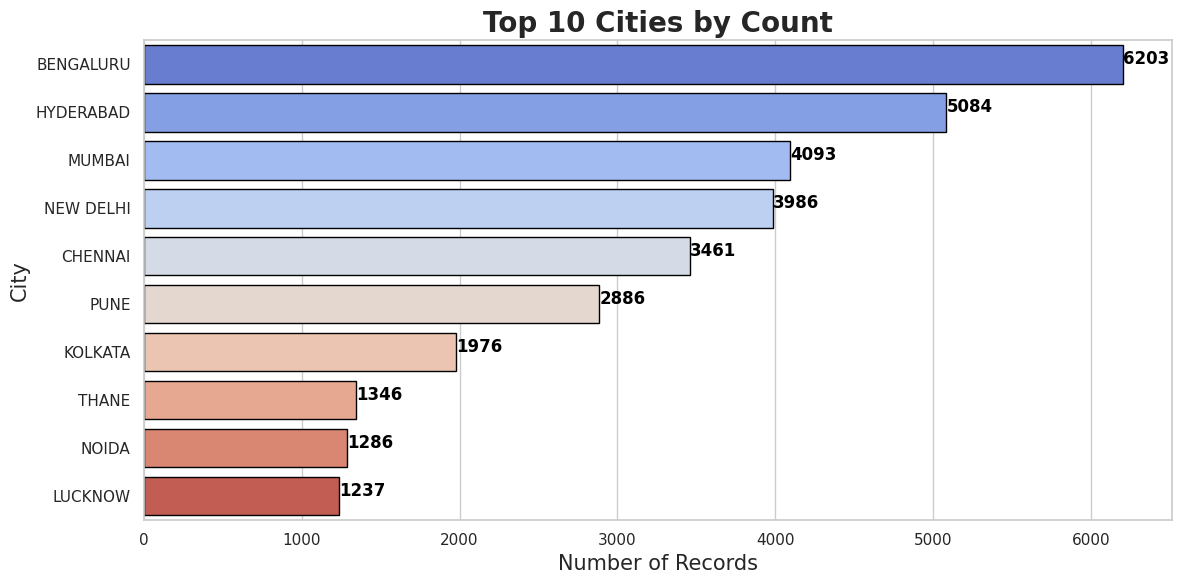

In [144]:
# Set seaborn style
sns.set(style="whitegrid")

# Get top 10 cities
top_cities = df['City'].value_counts().nlargest(10)

# Create figure
plt.figure(figsize=(12,6))
# Horizontal bar plot
ax = sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm", edgecolor='black')
# Add value labels on bars
for i, v in enumerate(top_cities.values):
    ax.text(v + 0.3, i, str(v), color='black', fontweight='bold', fontsize=12)
# Set title and labels
plt.title("Top 10 Cities by Count", fontsize=20, fontweight='bold')
plt.xlabel("Number of Records", fontsize=15)
plt.ylabel("City", fontsize=15)
# Improve layout
plt.tight_layout()
# Show plot
plt.show()

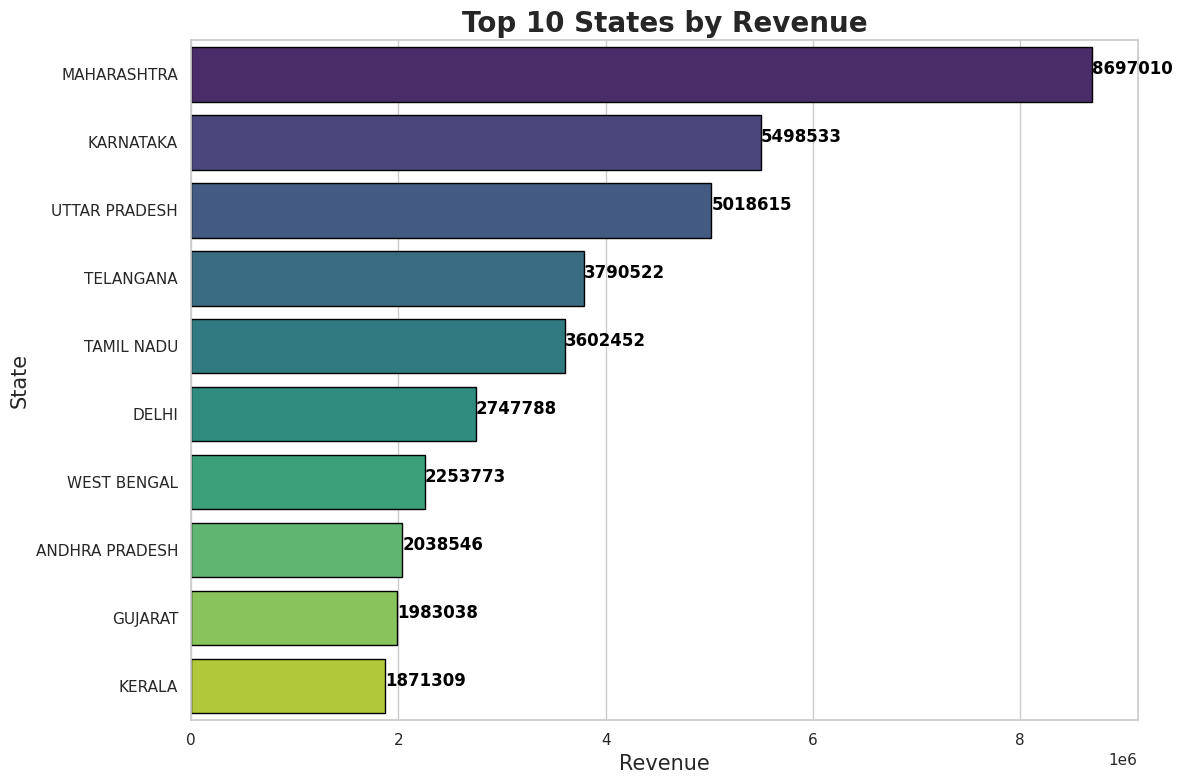

In [145]:
# Set seaborn style
sns.set(style="whitegrid")

# Calculate total revenue by state
state_revenue = df.groupby('State')['Amount'].sum()

# Create a figure with larger size
plt.figure(figsize=(12, 8))
# Plot bar chart with colors and edge
# Use top_state_revenue which was calculated earlier
ax = sns.barplot(x=state_revenue.nlargest(10).values, y=state_revenue.nlargest(10).index,
                 palette='viridis', edgecolor='black')
# Add value labels on bars
for i, v in enumerate(state_revenue.nlargest(10).values):
    ax.text(v + 0.5, i, str(int(v)), color='black', fontweight='bold', fontsize=12) # Added int(v) to display as integer
# Set title and labels
plt.title("Top 10 States by Revenue", fontsize=20, fontweight='bold')
plt.xlabel("Revenue", fontsize=15) # Changed label to Revenue
plt.ylabel("State", fontsize=15)
# Improve layout
plt.tight_layout()
# Show plot
plt.show()

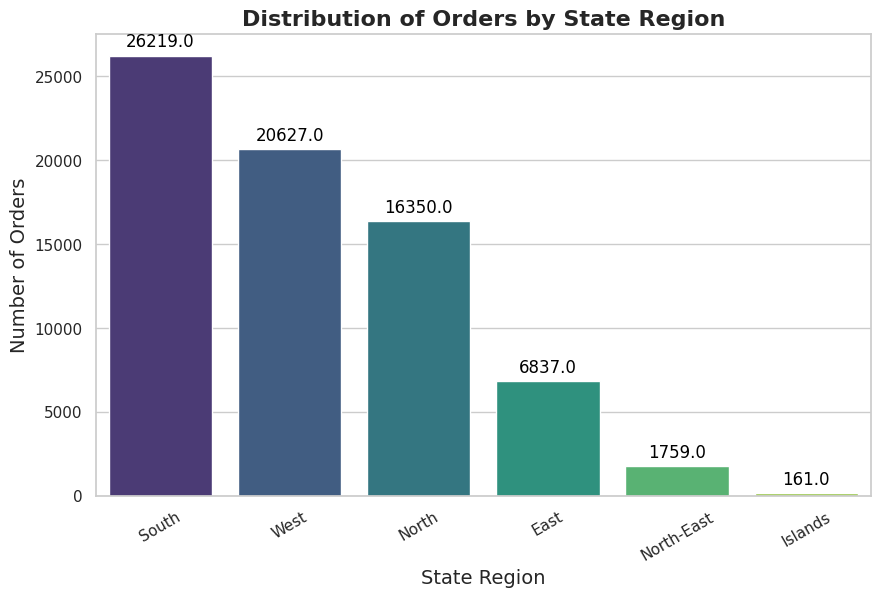

In [146]:
sns.set_theme(style="whitegrid")
#Countplot for State_region
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="State_region", palette="viridis", order=df['State_region'].value_counts().index)

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title("Distribution of Orders by State Region", fontsize=16, fontweight="bold")
plt.xlabel("State Region", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)
plt.xticks(rotation=30)
plt.show()


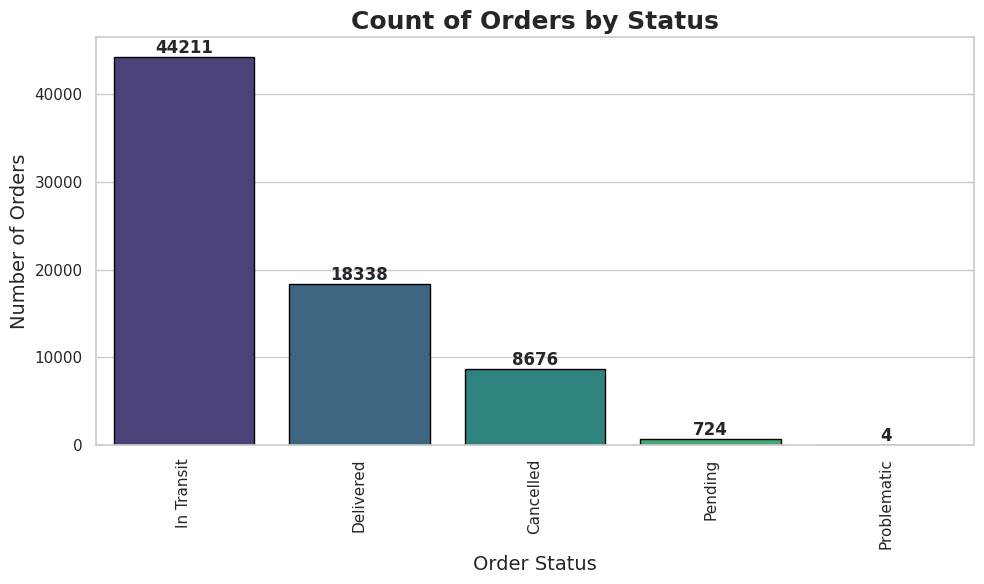

In [147]:
# Set the style
sns.set(style="whitegrid")
# Create figure
plt.figure(figsize=(10,6))
# Plot bar chart using Seaborn
ax = sns.countplot(
    x='Order_status',
    data=df,
    palette='viridis',
    order=df['Order_status'].value_counts().index,
    edgecolor='black'
)
# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height + 5,  # slightly above the bar
        s=f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )
# Title and labels
plt.title('Count of Orders by Status', fontsize=18, fontweight='bold')
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
# Rotate x labels if needed
plt.xticks(rotation=90)
# Improve layout
plt.tight_layout()
# Show plot
plt.show()

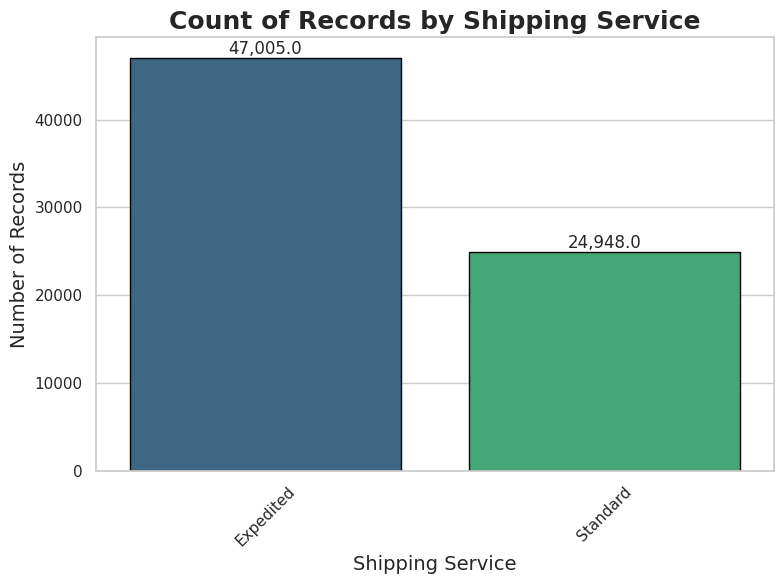

In [148]:
# Set Seaborn style
sns.set(style="whitegrid")
# Create figure
plt.figure(figsize=(8, 6))
# Get the value counts of Shipping_service
shipping_counts = df['Shipping_service'].value_counts()
# Create a barplot
ax = sns.barplot(
    x=shipping_counts.index,
    y=shipping_counts.values,
    palette="viridis",
    edgecolor='black'
)
# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=12
    )
# Title and labels
plt.title("Count of Records by Shipping Service", fontsize=18, fontweight='bold')
plt.xlabel("Shipping Service", fontsize=14)
plt.ylabel("Number of Records", fontsize=14)
plt.xticks(rotation=45)
# Improve layout
plt.tight_layout()
# Show plot
plt.show()

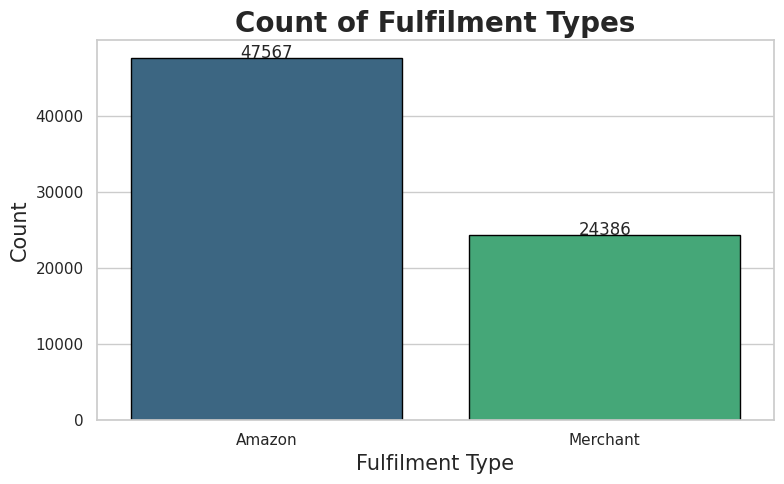

In [149]:
# Set Seaborn style
sns.set(style="whitegrid")
# Count of Fulfilment_type
fulfilment_counts = df['Fulfilment_type'].value_counts()
# Create figure
plt.figure(figsize=(8,5))
# Create bar plot with colors
ax = sns.barplot(
    x=fulfilment_counts.index,
    y=fulfilment_counts.values,
    palette="viridis",  # nice color gradient
    edgecolor='black'
)
# Add value labels on top of bars
for p in ax.patches:
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=p.get_height() + 5,  # slightly above the bar
        s=int(p.get_height()),
        ha='center',
        fontsize=12
    )
# Set title and labels
plt.title("Count of Fulfilment Types", fontsize=20, fontweight='bold')
plt.xlabel("Fulfilment Type", fontsize=15)
plt.ylabel("Count", fontsize=15)
# Improve layout
plt.tight_layout()
# Show plot
plt.show()

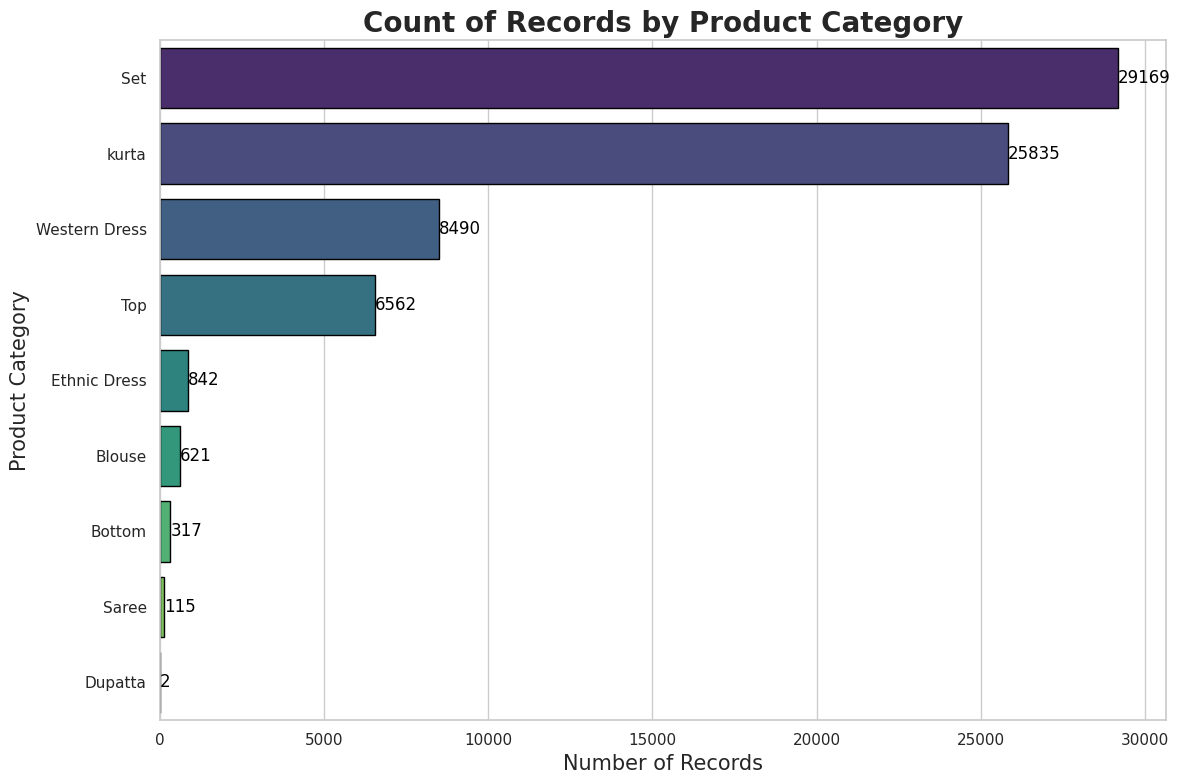

In [150]:
# Set Seaborn style
sns.set(style="whitegrid")
# Create figure
plt.figure(figsize=(12,8))
# Countplot with colors
ax = sns.countplot(
    y='Product_category',
    data=df,
    order=df['Product_category'].value_counts().index,
    palette='viridis',
    edgecolor='black'
)
# Add value labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.3, p.get_y() + p.get_height()/2, int(width),
            va='center', fontsize=12, color='black')
# Set title and labels
plt.title("Count of Records by Product Category", fontsize=20, fontweight='bold')
plt.xlabel("Number of Records", fontsize=15)
plt.ylabel("Product Category", fontsize=15)
# Improve layout
plt.tight_layout()
# Show plot
plt.show()

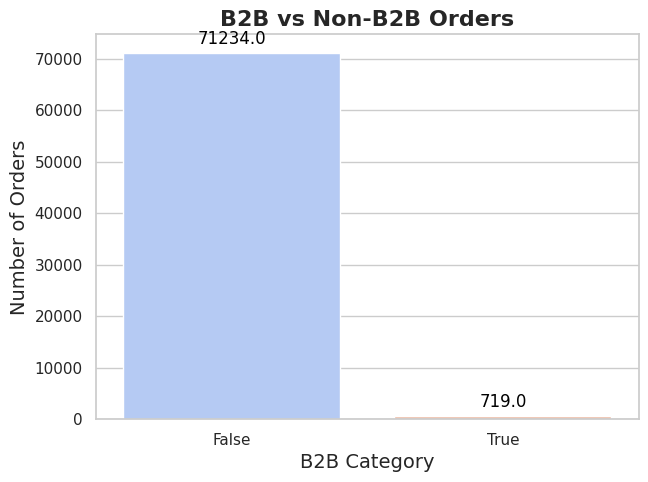

In [151]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="whitegrid")
#Countplot for B2B
plt.figure(figsize=(7,5))
ax = sns.countplot(data=df, x="B2B", palette="coolwarm", order=df["B2B"].value_counts().index)
# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title("B2B vs Non-B2B Orders", fontsize=16, fontweight="bold")
plt.xlabel("B2B Category", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)
plt.show()

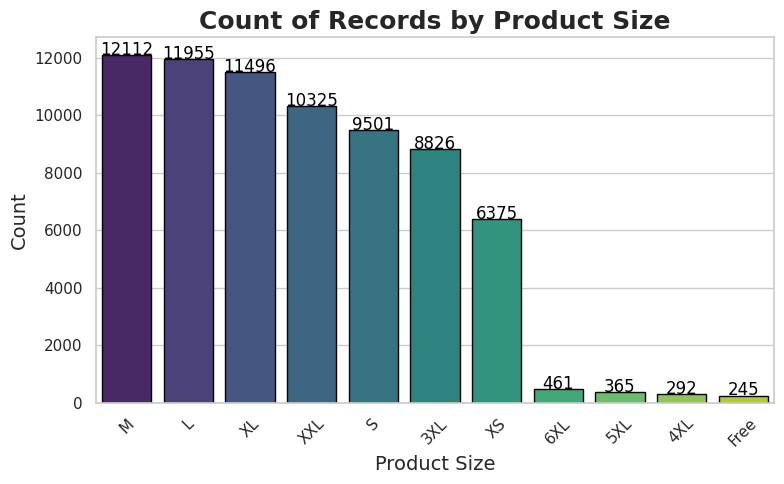

In [152]:
# Set the Seaborn style
sns.set(style="whitegrid")
# Create figure
plt.figure(figsize=(8, 5))
# Plot the count of each product size
ax = sns.countplot(
    x='product_size',
    data=df,
    order=df['product_size'].value_counts().index,  # order by frequency
    palette='viridis',  # beautiful color palette
    edgecolor='black'
)
# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height + 2,
        s=int(height),
        ha='center',
        fontsize=12,
        color='black'
    )
# Set title and labels
plt.title('Count of Records by Product Size', fontsize=18, fontweight='bold')
plt.xlabel('Product Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Rotate x-axis labels if needed
plt.xticks(rotation=45)
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

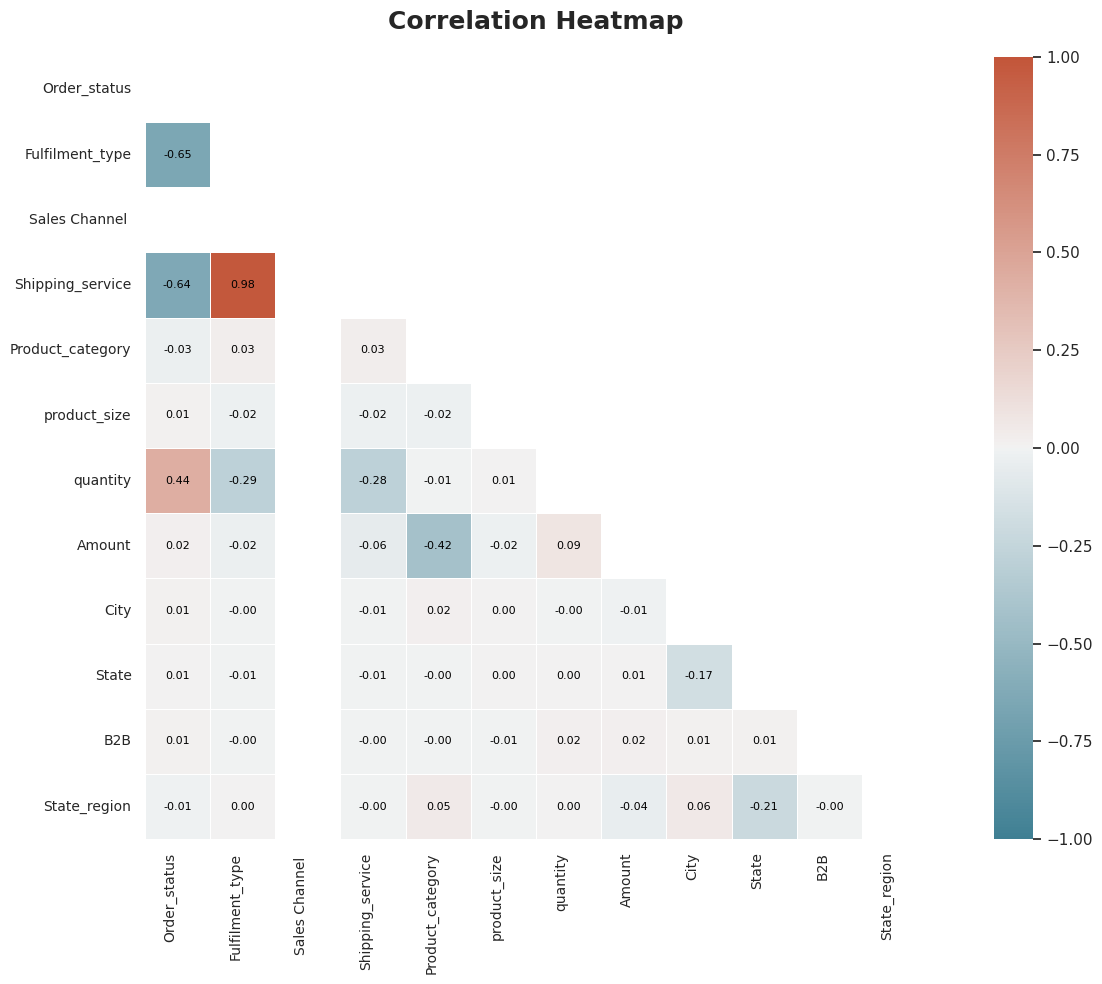

In [153]:
from sklearn.preprocessing import LabelEncoder

# Drop Date only if it exists
if 'Date' in df.columns:
    df_encoded = df.drop(columns=['Date'])
else:
    df_encoded = df.copy()

# Encode categorical variables
label_enc = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':   # only encode categorical
        df_encoded[col] = label_enc.fit_transform(df_encoded[col].astype(str))

# Correlation matrix
corr_matrix = df_encoded.corr()

# ---- Beautiful Heatmap ----
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 10))
sns.set_theme(style="white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

mask = np.triu(corr_matrix)  # hide upper triangle
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmin=-1, vmax=1, center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8, "color": "black"}
)

plt.title("Correlation Heatmap", fontsize=18, weight="bold", pad=20)
plt.xticks(rotation=90, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


# **First**
Problem Statement:

Understanding how product demand varies across regions, states, and cities is a challenge for businesses, as customer preferences change with geography.

Justification:

Analyzing sales by product category across locations helps identify high-demand areas, improve distribution, and reduce unsold inventory. This supports better decision-making and demand forecasting.


In [154]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B,State_region
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False,West
1,Delivered,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False,South
2,In Transit,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,West
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False,South
4,In Transit,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False,South
...,...,...,...,...,...,...,...,...,...,...,...,...
71948,In Transit,Amazon,Amazon.in,Expedited,Western Dress,S,1,899.00,KALAMASSERY,KERALA,False,South
71949,In Transit,Amazon,Amazon.in,Expedited,Set,XL,1,824.00,NEW DELHI,DELHI,False,North
71950,Cancelled,Amazon,Amazon.in,Expedited,Set,M,1,612.00,MUMBAI,MAHARASHTRA,False,West
71951,In Transit,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False,South


In [155]:
df.groupby(["Product_category","State_region"]).size().unstack(fill_value=0)

State_region,East,Islands,North,North-East,South,West
Product_category,,,,,,
Blouse,53,0,141,14,280,133
Bottom,37,1,63,6,131,79
Dupatta,0,0,0,0,2,0
Ethnic Dress,66,0,169,15,336,256
Saree,14,0,27,0,48,26
Set,2999,75,7792,823,9442,8038
Top,547,8,1650,172,1923,2262
Western Dress,702,16,1549,190,3500,2533
kurta,2419,61,4959,539,10557,7300


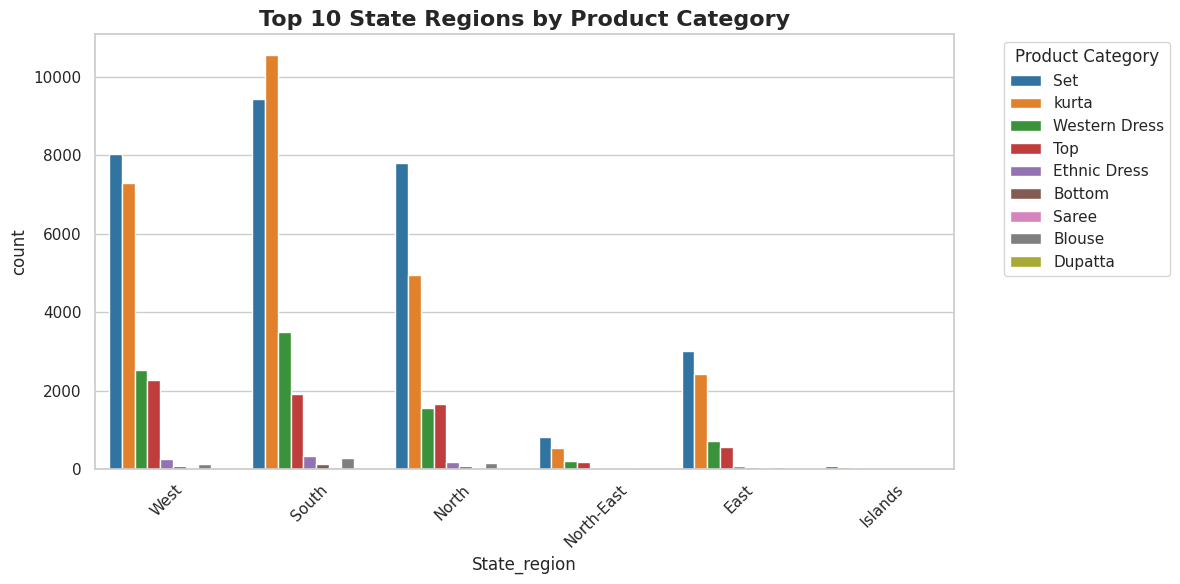

In [156]:
# Set style
sns.set_theme(style="whitegrid")

# --- Top 10 State Regions ---
top_regions = df['State_region'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['State_region'].isin(top_regions)],
              x="State_region", hue="Product_category", palette="tab10")
plt.title("Top 10 State Regions by Product Category", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [157]:
df.groupby(["Product_category","State"]).size().unstack(fill_value=0)

State,ANDAMAN & NICOBAR,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHHATTISGARH,DELHI,GOA,GUJARAT,...,PUNJAB,RAJASTHAN,RAJSTHAN,SIKKIM,TAMIL NADU,TELANGANA,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL
Product_category,,,,,,,,,,,,,,,,,,,,,
Blouse,0,12,0,8,11,1,3,37,3,20,...,7,7,0,0,62,59,0,77,9,27
Bottom,1,13,1,4,9,2,0,10,1,14,...,7,6,0,0,34,29,0,29,4,18
Dupatta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Ethnic Dress,0,26,0,10,9,2,7,53,5,33,...,11,8,0,0,66,100,0,68,6,38
Saree,0,1,0,0,2,0,1,8,3,2,...,0,2,0,0,21,6,0,14,3,7
Set,75,1135,24,419,671,138,263,1828,135,1146,...,556,774,0,51,1904,2139,38,3486,477,1321
Top,8,114,11,75,66,43,37,488,56,349,...,154,139,1,9,435,423,7,572,105,351
Western Dress,16,441,13,105,112,23,50,406,63,467,...,113,165,0,9,646,783,13,728,63,398
kurta,61,1432,8,352,352,86,201,1235,242,979,...,314,532,0,12,2632,2073,43,2288,316,1322


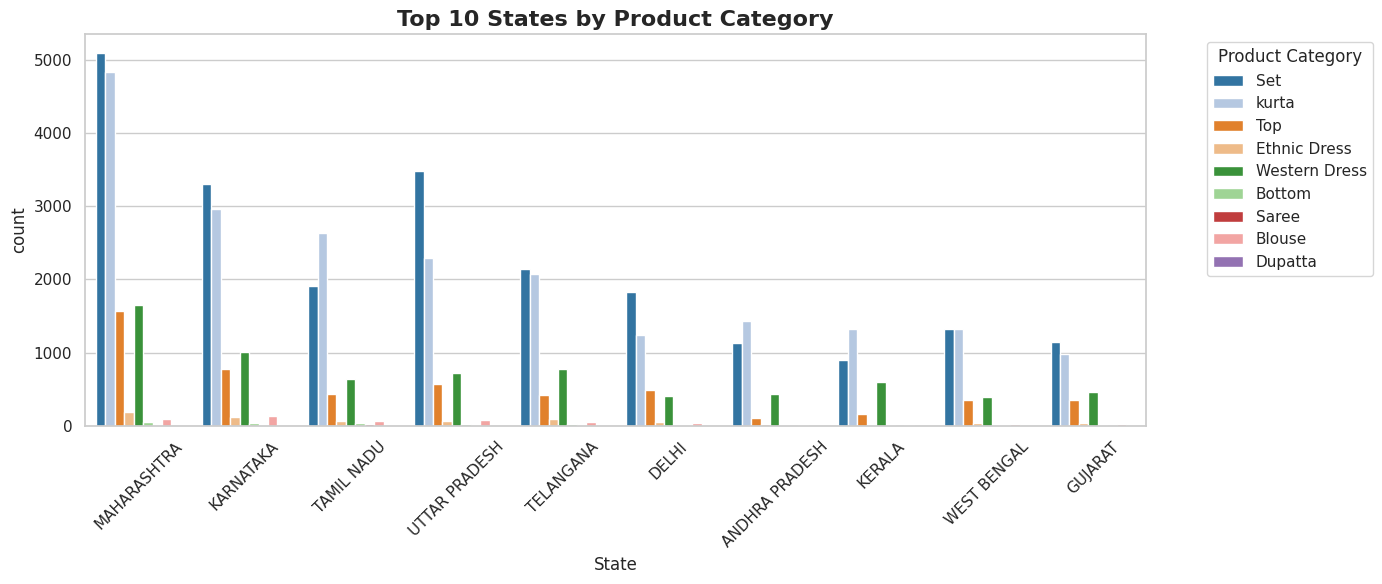

In [158]:
# --- Top 10 States ---
top_states = df['State'].value_counts().head(10).index
plt.figure(figsize=(14,6))
sns.countplot(data=df[df['State'].isin(top_states)],
              x="State", hue="Product_category", palette="tab20")
plt.title("Top 10 States by Product Category", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [159]:
df.groupby(["Product_category","City"]).size().unstack(fill_value=0)

City,ADALAJ,AGARTALA,AGRA,AHMADNAGAR,AHMEDABAD,AIZAWL,AJMER,AKOLA,ALAPPUZHA,ALIGARH,...,VIJAYAWADA,VILLUPURAM,VIRAR WEST,VISAKHAPATNAM,VIZIANAGARAM,WARANGAL,WARDHA,YAMUNANAGAR,YAVATMAL,ZIRAKPUR
Product_category,,,,,,,,,,,,,,,,,,,,,
Blouse,1,0,2,0,9,0,0,0,1,7,...,0,0,0,5,0,0,0,0,0,0
Bottom,0,0,0,0,6,0,0,0,0,1,...,1,0,0,3,0,1,0,0,0,0
Dupatta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ethnic Dress,0,0,0,0,9,1,1,0,0,2,...,1,0,0,5,1,2,0,0,0,1
Saree,0,0,0,1,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
Set,12,38,134,27,408,23,41,22,20,51,...,156,12,11,267,28,63,12,23,21,70
Top,3,7,8,4,156,14,10,6,5,6,...,18,0,4,33,0,6,4,9,1,20
Western Dress,7,13,16,7,206,3,5,1,12,5,...,51,0,7,95,11,28,5,5,4,16
kurta,9,43,66,15,347,19,26,22,29,37,...,168,16,12,277,54,83,13,11,12,31


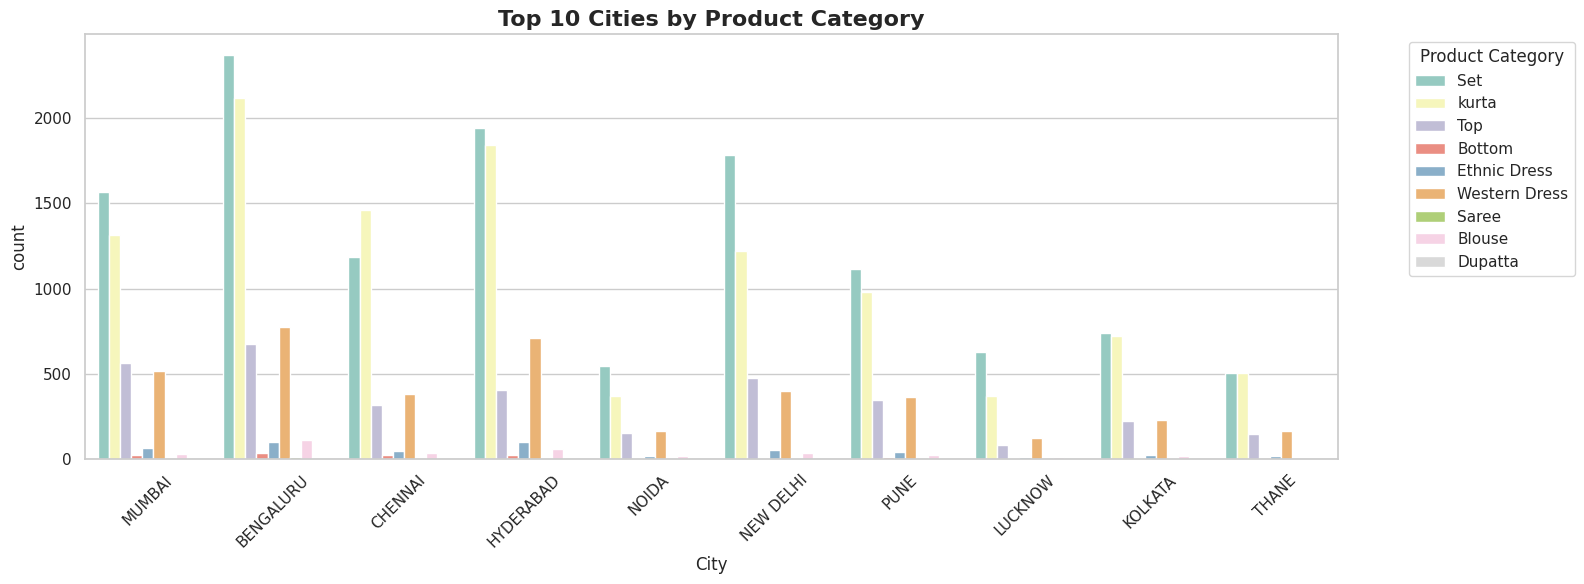

In [160]:
# --- Top 10 Cities ---
top_cities = df['City'].value_counts().head(10).index
plt.figure(figsize=(16,6))
sns.countplot(data=df[df['City'].isin(top_cities)],
              x="City", hue="Product_category", palette="Set3")
plt.title("Top 10 Cities by Product Category", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Second**
Problem Statement

In the e-commerce industry, customer demand differs across regions, states, and cities. One important factor is product size, which affects customer satisfaction, shipping, and purchase decisions. Many businesses use a uniform approach without studying how size preferences vary by location. This gap can cause poor inventory planning, higher returns, and missed sales. Hence, it is important to analyze how product size preferences differ across geographical areas.

Justification

This study is useful as it helps businesses optimize inventory, packaging, and logistics by understanding regional demand. Unlike general sales trend studies, this project focuses on the link between product size and location, offering a fresh perspective. The findings can reduce cancellations, improve delivery accuracy, and support regional marketing strategies. Moreover, the approach can be scaled for different products and markets, making it valuable for long-term business planning.

In [161]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B,State_region
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False,West
1,Delivered,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False,South
2,In Transit,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,West
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False,South
4,In Transit,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False,South
...,...,...,...,...,...,...,...,...,...,...,...,...
71948,In Transit,Amazon,Amazon.in,Expedited,Western Dress,S,1,899.00,KALAMASSERY,KERALA,False,South
71949,In Transit,Amazon,Amazon.in,Expedited,Set,XL,1,824.00,NEW DELHI,DELHI,False,North
71950,Cancelled,Amazon,Amazon.in,Expedited,Set,M,1,612.00,MUMBAI,MAHARASHTRA,False,West
71951,In Transit,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False,South


In [162]:
df.groupby(["product_size","State_region"]).size().unstack(fill_value=0)

State_region,East,Islands,North,North-East,South,West
product_size,,,,,,
3XL,807,18,2099,158,3026,2718
4XL,33,0,46,3,118,92
5XL,33,0,63,6,143,120
6XL,35,0,79,0,217,130
Free,27,0,67,2,100,49
L,1115,22,2771,293,4408,3346
M,1226,38,2775,359,4327,3387
S,934,11,2180,299,3514,2563
XL,1055,28,2576,231,4168,3438


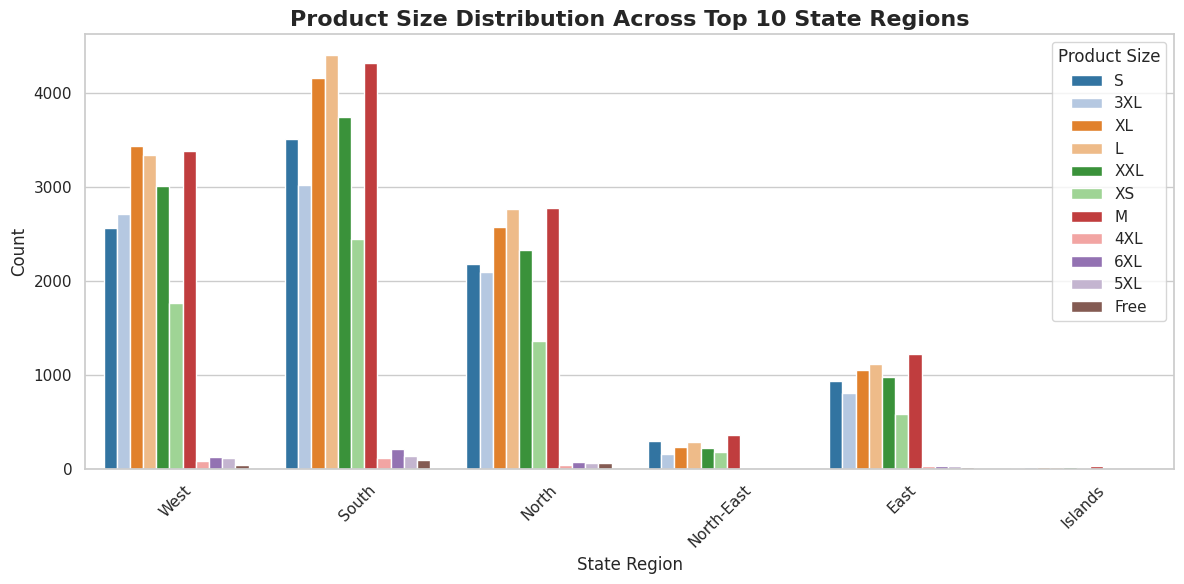

In [163]:
# Set modern style
sns.set_theme(style="whitegrid")

# --- 1. Product Size vs State_region (Top 10) ---
top_regions = df["State_region"].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.countplot(
    data=df[df["State_region"].isin(top_regions)],
    x="State_region",
    hue="product_size",
    palette="tab20")
plt.title("Product Size Distribution Across Top 10 State Regions", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.xlabel("State Region")
plt.ylabel("Count")
plt.legend(title="Product Size")
plt.tight_layout()
plt.show()

In [164]:
df.groupby(["product_size","State"]).size().unstack(fill_value=0)

State,ANDAMAN & NICOBAR,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHHATTISGARH,DELHI,GOA,GUJARAT,...,PUNJAB,RAJASTHAN,RAJSTHAN,SIKKIM,TAMIL NADU,TELANGANA,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL
product_size,,,,,,,,,,,,,,,,,,,,,
3XL,18,330,4,98,130,43,62,566,50,425,...,174,180,0,10,665,745,7,873,98,446
4XL,0,12,0,2,0,0,0,13,1,4,...,1,4,0,0,28,21,0,24,2,26
5XL,0,17,0,6,2,0,2,24,0,14,...,1,8,0,0,30,27,0,26,1,27
6XL,0,21,0,0,4,3,2,25,0,16,...,5,8,0,0,54,46,0,36,1,25
Free,0,3,0,2,4,1,2,13,3,8,...,3,3,0,0,34,22,0,38,7,14
L,22,578,8,173,191,62,96,655,69,475,...,199,289,0,14,952,894,14,1209,177,565
M,38,555,11,185,264,54,106,628,93,486,...,185,301,0,17,954,893,28,1321,172,562
S,11,464,14,169,202,28,93,546,80,357,...,128,208,0,14,738,726,17,950,144,427
XL,28,488,6,120,157,48,79,626,80,521,...,183,273,1,12,929,876,12,1151,159,564


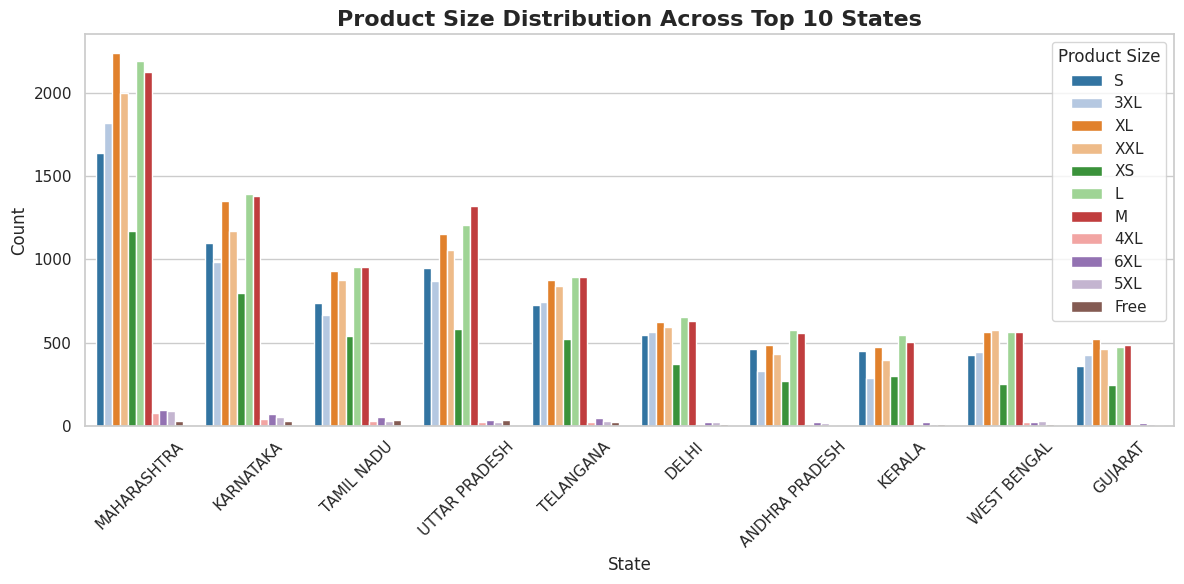

In [165]:
# --- 2. Product Size vs State (Top 10) ---
top_states = df["State"].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.countplot(
    data=df[df["State"].isin(top_states)],
    x="State",
    hue="product_size",
    palette="tab20")
plt.title("Product Size Distribution Across Top 10 States", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Count")
plt.legend(title="Product Size")
plt.tight_layout()
plt.show()

In [166]:
df.groupby(["product_size","City"]).size().unstack(fill_value=0)

City,ADALAJ,AGARTALA,AGRA,AHMADNAGAR,AHMEDABAD,AIZAWL,AJMER,AKOLA,ALAPPUZHA,ALIGARH,...,VIJAYAWADA,VILLUPURAM,VIRAR WEST,VISAKHAPATNAM,VIZIANAGARAM,WARANGAL,WARDHA,YAMUNANAGAR,YAVATMAL,ZIRAKPUR
product_size,,,,,,,,,,,,,,,,,,,,,
3XL,2,7,27,6,184,5,12,2,8,22,...,44,8,7,86,8,24,2,6,1,23
4XL,0,0,0,1,1,0,0,1,0,0,...,0,0,0,4,0,0,0,0,0,0
5XL,1,0,0,0,8,0,1,0,0,0,...,3,0,0,7,1,0,0,0,0,0
6XL,0,0,2,0,8,0,0,0,0,0,...,1,0,0,4,1,0,0,0,0,1
Free,0,0,2,1,3,0,0,0,1,1,...,0,4,0,1,0,0,0,0,0,0
L,7,14,43,4,176,11,21,11,14,16,...,67,3,7,124,12,18,6,12,5,23
M,1,28,32,11,184,12,19,5,13,24,...,52,4,3,130,19,37,6,6,7,26
S,7,17,27,12,127,4,10,7,14,7,...,53,2,2,90,13,37,7,7,7,13
XL,9,12,35,9,188,9,11,17,9,20,...,82,4,7,93,14,26,4,2,6,20


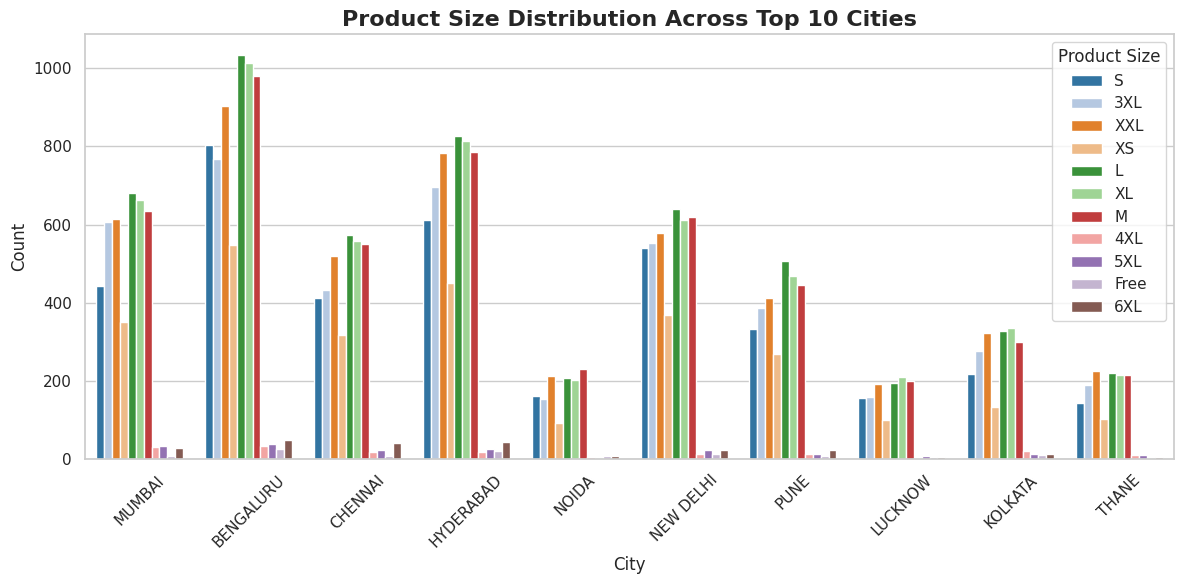

In [167]:
# --- 3. Product Size vs City (Top 10) ---
top_cities = df["City"].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.countplot(
    data=df[df["City"].isin(top_cities)],
    x="City",
    hue="product_size",
    palette="tab20")
plt.title("Product Size Distribution Across Top 10 Cities", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Count")
plt.legend(title="Product Size")
plt.tight_layout()
plt.show()

# **Third**
Problem Statement

*   List itemIn the order data, most statuses are still in process (e.g., In Transit, Pending, Problematic). However, only Delivered and Cancelled orders represent final outcomes with no further updates. This creates a clear opportunity to analyze the actual net revenue, since revenue is only realized when an order is delivered and lost when an order is cancelled. By focusing on these two statuses, we can differentiate performance across State_region, State, i want justification for this problem statemty in logical way





Justification:



*   Focusing only on Delivered and Cancelled orders allows the business to measure realized revenue accurately. Orders in other statuses (In Transit, Pending, Problematic) are uncertain and do not reflect final financial impact. By isolating completed outcomes, we can calculate Net Revenue (Delivered Amount − Cancelled Amount) and evaluate which State_regions and States contribute most or least to profitability. This analysis highlights regions with high cancellations, identifies areas for operational improvement, and supports targeted marketing or logistical strategies, ultimately helping the company maximize revenue and reduce losses.






**Explanation**

*   Net Revenue means the money left after subtracting cancelled orders from delivered orders. It shows the actual earnings the company keeps.

*   Net Revenue % of Total Order Value tells what percentage of the total order value (delivered + cancelled together) is finally kept as net revenue.
*   Net Revenue % of Delivered Value tells what percentage of the delivered value remains after cancellations. It basically shows how much of the delivered revenue was affected by cancellations.
*   Net Revenue Share % tells how much each state or region contributes to the company’s total net revenue.

("➡ Net Revenue = Delivered Amount - Cancelled Amount") (" (✅It shows how much actual revenue remains after removing losses from cancellations.)")

("➡ Net Revenue % of Total Order Value = (Net Revenue / (Delivered + Cancelled)) * 100")
("   ✅ Tells what % of total order value (delivered + cancelled) is retained as net revenue.")

("➡ Net Revenue % of Delivered Value = (Net Revenue / Delivered) * 100")
("   ✅ Tells what % of delivered value remains as net revenue after cancellations.")

("➡ Net Revenue share % = (Net Revenue / Total Net Revenue) * 100")
("   ✅ Tells what share of overall company net revenue is contributed by each State_region.")

**Business Use**
*   It helps the company see where cancellations are causing the biggest
 revenue losses.
*   It shows which regions are contributing strongly or weakly to overall net revenue.
*   It guides managers on where to improve marketing, logistics, or operations so weaker regions can perform better.







In [168]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B,State_region
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False,West
1,Delivered,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False,South
2,In Transit,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,West
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False,South
4,In Transit,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False,South
...,...,...,...,...,...,...,...,...,...,...,...,...
71948,In Transit,Amazon,Amazon.in,Expedited,Western Dress,S,1,899.00,KALAMASSERY,KERALA,False,South
71949,In Transit,Amazon,Amazon.in,Expedited,Set,XL,1,824.00,NEW DELHI,DELHI,False,North
71950,Cancelled,Amazon,Amazon.in,Expedited,Set,M,1,612.00,MUMBAI,MAHARASHTRA,False,West
71951,In Transit,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False,South


In [169]:
print("Order_status	")
print(df["Order_status"].value_counts()
)

Order_status	
Order_status
In Transit     44211
Delivered      18338
Cancelled       8676
Pending          724
Problematic        4
Name: count, dtype: int64


In [170]:
# Keep only Delivered & Cancelled
df_filtered = df[df['Order_status'].isin(['Delivered', 'Cancelled'])]
# Group by State_region and calculate Delivered Amount & Cancelled Amount
grouped = df_filtered.groupby(['State_region', 'Order_status'])['Amount'].sum().unstack(fill_value=0)
# Rename columns
grouped = grouped.rename(columns={'Delivered': 'Delivered Amount', 'Cancelled': 'Cancelled Amount'})
# Calculate Net Revenue (Delivered - Cancelled)
grouped['Net Revenue'] = grouped['Delivered Amount'] - grouped['Cancelled Amount']
# Formula 1: (Net Revenue / (Delivered + Cancelled)) * 100
grouped['Net Revenue % of Total Order Value'] = (grouped['Net Revenue'] /
                                                              (grouped['Delivered Amount'] + grouped['Cancelled Amount'])) * 100
# Formula 2: (Net Revenue / Delivered Amount) * 100
grouped['Net Revenue % of Delivered Value'] = (grouped['Net Revenue'] /
                                                      grouped['Delivered Amount']) * 100
# Formula 3: (Net Revenue / Total Net Revenue) * 100
total_net_revenue = grouped['Net Revenue'].sum()
grouped['Net Revenue share %'] = (grouped['Net Revenue'] / total_net_revenue) * 100
# Reset index for clean table
grouped = grouped.reset_index()
# Print table
grouped


Order_status,State_region,Cancelled Amount,Delivered Amount,Net Revenue,Net Revenue % of Total Order Value,Net Revenue % of Delivered Value,Net Revenue share %
0,East,555090.34,1042871.0,487780.66,30.525185,46.772866,7.652729
1,Islands,20751.24,15926.0,-4825.24,-13.155952,-30.297878,-0.075703
2,North,1280737.67,2903682.0,1622944.33,38.785410,55.892633,25.462170
3,North-East,147658.38,280920.0,133261.62,31.093874,47.437569,2.090725
4,South,2175619.90,4243343.0,2067723.10,32.212729,48.728634,32.440248
5,West,1431821.87,3498881.0,2067059.13,41.922200,59.077720,32.429831


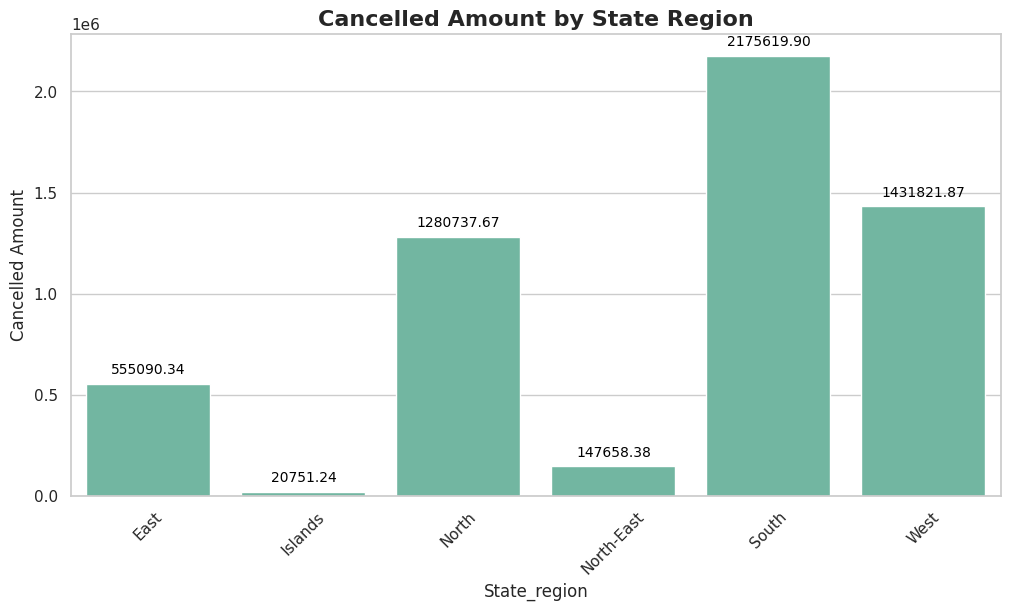

In [171]:
# Set style
sns.set(style="whitegrid", palette="Set2")

# Helper function to add values on bars
def add_values(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ".2f"),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# 1. Cancelled Amount by State_region
plt.figure(figsize=(12,6))
ax = sns.barplot(data=grouped, x="State_region", y="Cancelled Amount")
add_values(ax)
plt.title("Cancelled Amount by State Region", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Cancelled Amount")
plt.show()

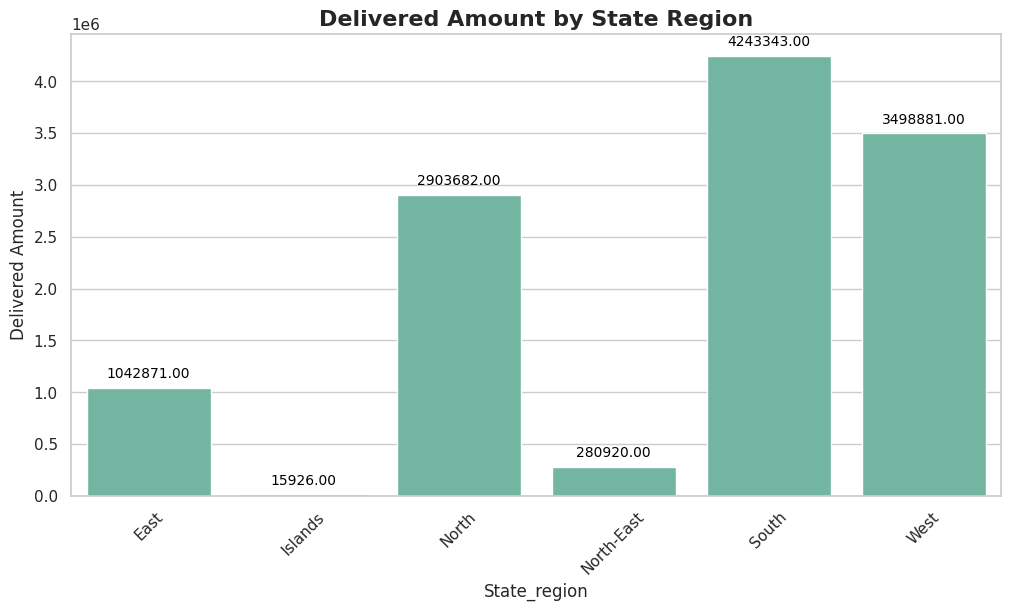

In [172]:
# 2. Delivered Amount by State_region
plt.figure(figsize=(12,6))
ax = sns.barplot(data=grouped, x="State_region", y="Delivered Amount")
add_values(ax)
plt.title("Delivered Amount by State Region", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Delivered Amount")
plt.show()

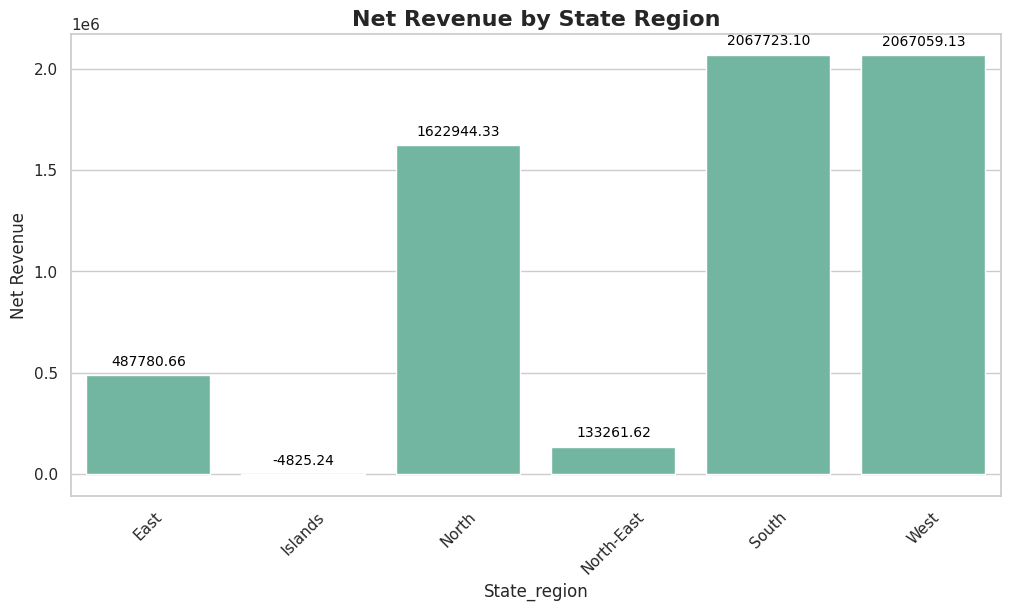

In [173]:
# 3. Net Revenue by State_region
plt.figure(figsize=(12,6))
ax = sns.barplot(data=grouped, x="State_region", y="Net Revenue")
add_values(ax)
plt.title("Net Revenue by State Region", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Net Revenue")
plt.show()

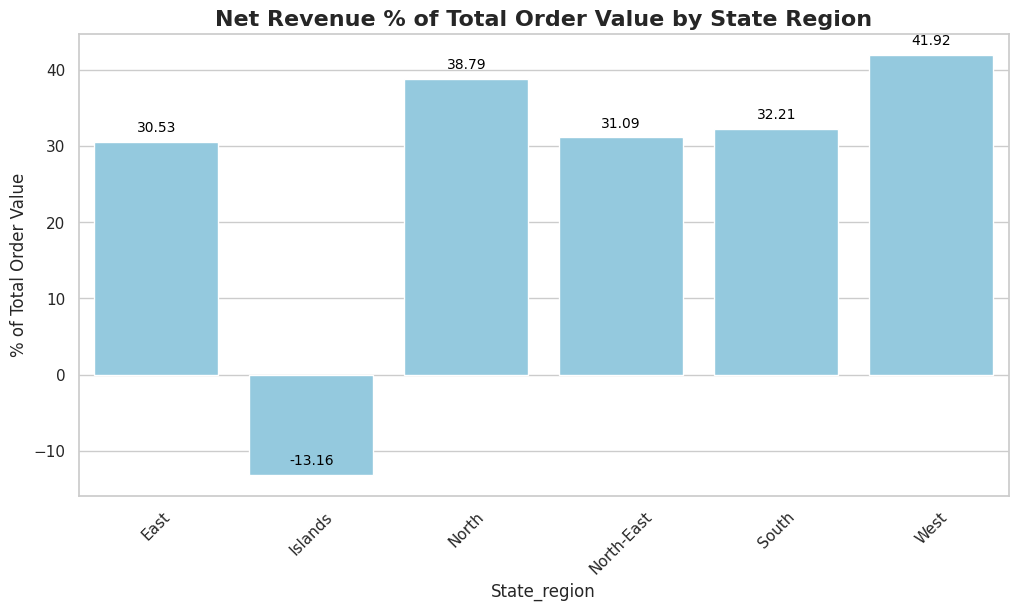

In [174]:
# 4. Net Revenue % of Total Order Value by State_region (Changed line -> bar)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=grouped, x="State_region", y="Net Revenue % of Total Order Value", color="skyblue")
add_values(ax)
plt.title("Net Revenue % of Total Order Value by State Region", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("% of Total Order Value")
plt.show()

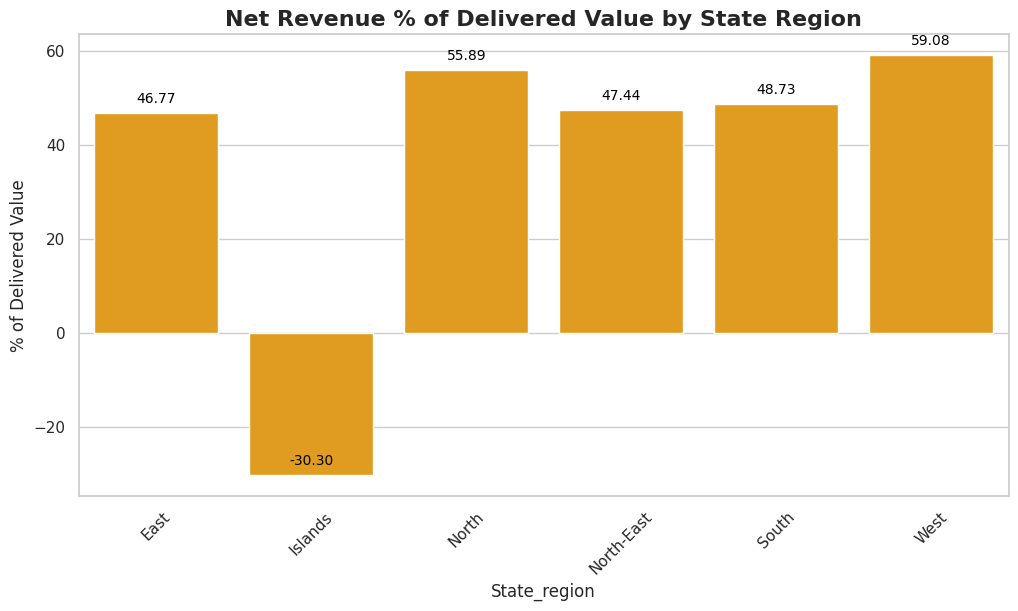

In [175]:
# 5. Net Revenue % of Delivered Value by State_region (Changed line -> bar)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=grouped, x="State_region", y="Net Revenue % of Delivered Value", color="orange")
add_values(ax)
plt.title("Net Revenue % of Delivered Value by State Region", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("% of Delivered Value")
plt.show()


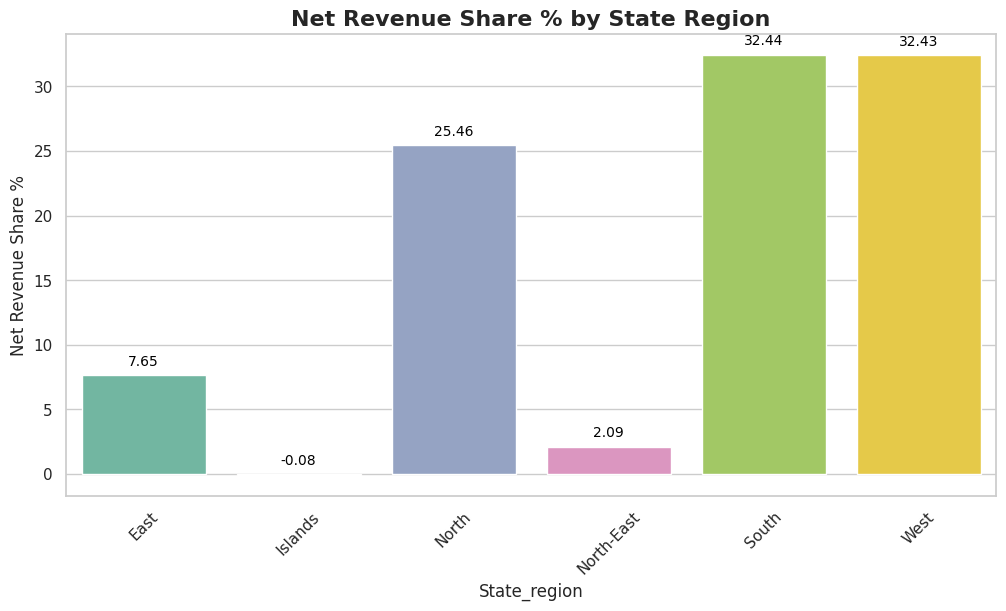

In [176]:
# 6. Net Revenue Share % by State_region
plt.figure(figsize=(12,6))
ax = sns.barplot(data=grouped, x="State_region", y="Net Revenue share %", palette="Set2")
add_values(ax)
plt.title("Net Revenue Share % by State Region", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Net Revenue Share %")
plt.show()

In [177]:
# Keep only Delivered & Cancelled
df_filtered = df[df['Order_status'].isin(['Delivered', 'Cancelled'])]
# Group by State and calculate Delivered Amount & Cancelled Amount
grouped = df_filtered.groupby(['State', 'Order_status'])['Amount'].sum().unstack(fill_value=0)
# Rename columns
grouped = grouped.rename(columns={'Delivered': 'Delivered Amount', 'Cancelled': 'Cancelled Amount'})
# Calculate Net Revenue (Delivered - Cancelled)
grouped['Net Revenue'] = grouped['Delivered Amount'] - grouped['Cancelled Amount']
# Formula 1: (Net Revenue / (Delivered + Cancelled)) * 100
grouped['Net Revenue % of Total Order Value,'] = (
    grouped['Net Revenue'] / (grouped['Delivered Amount'] + grouped['Cancelled Amount'])
) * 100
# Formula 2: (Net Revenue / Delivered Amount) * 100
grouped['Net Revenue % of Delivered Value,'] = (
    grouped['Net Revenue'] / grouped['Delivered Amount']
) * 100
# Formula 3: (Net Revenue / Total Net Revenue) * 100
total_net_revenue = grouped['Net Revenue'].sum()
grouped['Net Revenue share %,'] = (grouped['Net Revenue'] / total_net_revenue) * 100
# Reset index for clean table
grouped = grouped.reset_index()
# ---- Select Top 10 & Bottom 10 States based on Net Revenue ----
top_10_states = grouped.nlargest(10, 'Net Revenue')
# Final Output (Top 10)
final_result = pd.concat([top_10_states])
# Print final result
final_result.index = range(1, len(final_result) + 1)
final_result

Order_status,State,Cancelled Amount,Delivered Amount,Net Revenue,"Net Revenue % of Total Order Value,","Net Revenue % of Delivered Value,","Net Revenue share %,"
1,MAHARASHTRA,978981.43,2203287.0,1224305.57,38.472731,55.567231,19.207976
2,UTTAR PRADESH,568995.78,1269301.0,700305.22,38.095330,55.172510,10.987001
3,KARNATAKA,683184.12,1369866.0,686681.88,33.446913,50.127668,10.773266
4,TAMIL NADU,424475.21,868359.0,443883.79,34.334162,51.117544,6.964037
5,TELANGANA,558847.80,932536.0,373688.20,25.056474,40.072255,5.862747
6,DELHI,344692.91,711393.0,366700.09,34.722562,51.546767,5.753112
7,GUJARAT,205678.98,536884.0,331205.02,44.602953,61.690238,5.196234
8,KERALA,228883.95,537601.0,308717.05,40.276988,57.424940,4.843423
9,WEST BENGAL,253298.69,490904.0,237605.31,31.927499,48.401584,3.727760
10,ANDHRA PRADESH,266140.34,502116.0,235975.66,30.715745,46.996244,3.702192


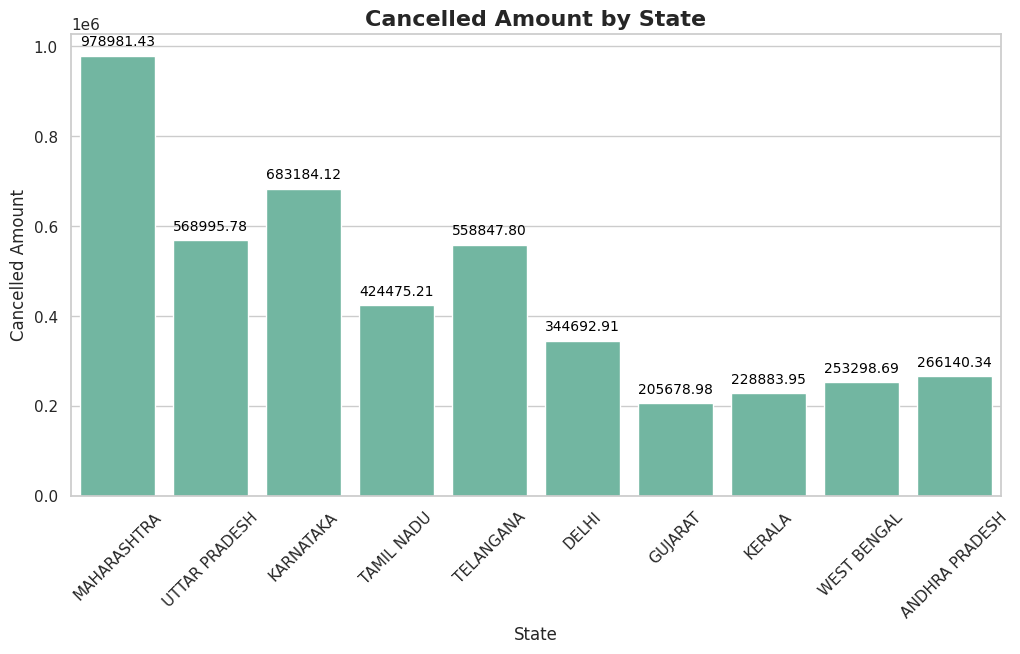

In [178]:
# 1. Cancelled Amount by State
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10_states, x="State", y="Cancelled Amount")
add_values(ax)
plt.title("Cancelled Amount by State", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Cancelled Amount")
plt.show()

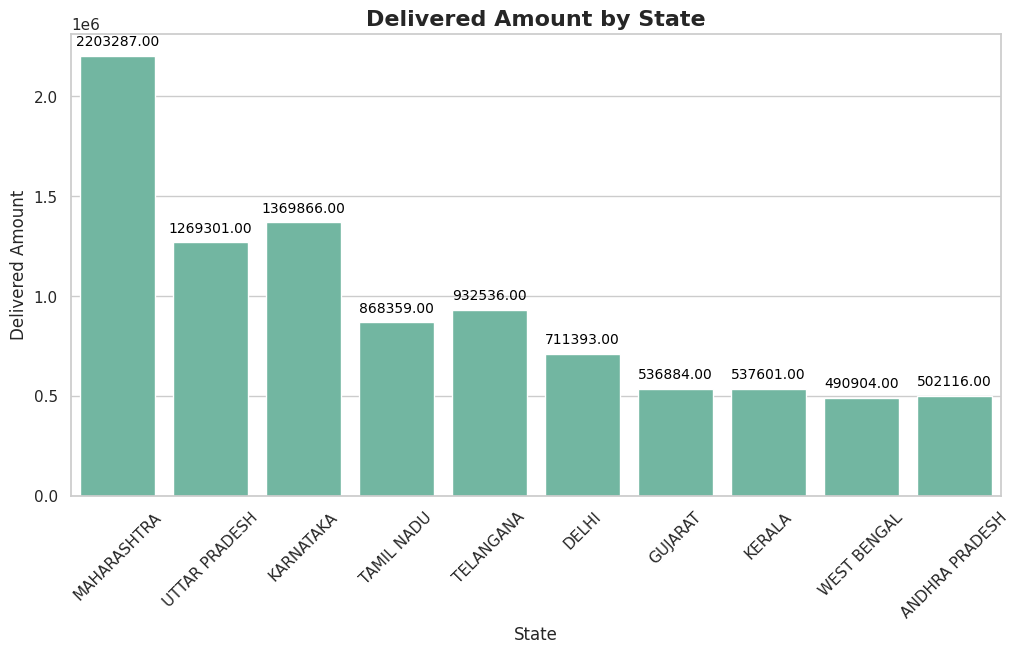

In [179]:
# 2. Delivered Amount by State
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10_states, x="State", y="Delivered Amount")
add_values(ax)
plt.title("Delivered Amount by State", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Delivered Amount")
plt.show()

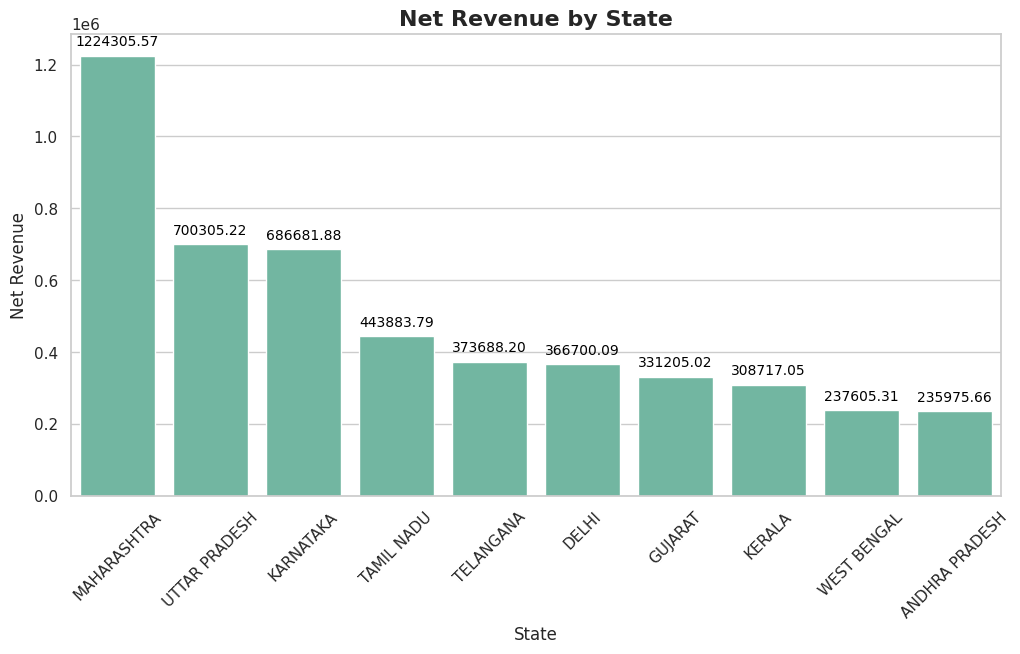

In [180]:
# 3. Net Revenue by State
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10_states, x="State", y="Net Revenue")
add_values(ax)
plt.title("Net Revenue by State", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Net Revenue")
plt.show()

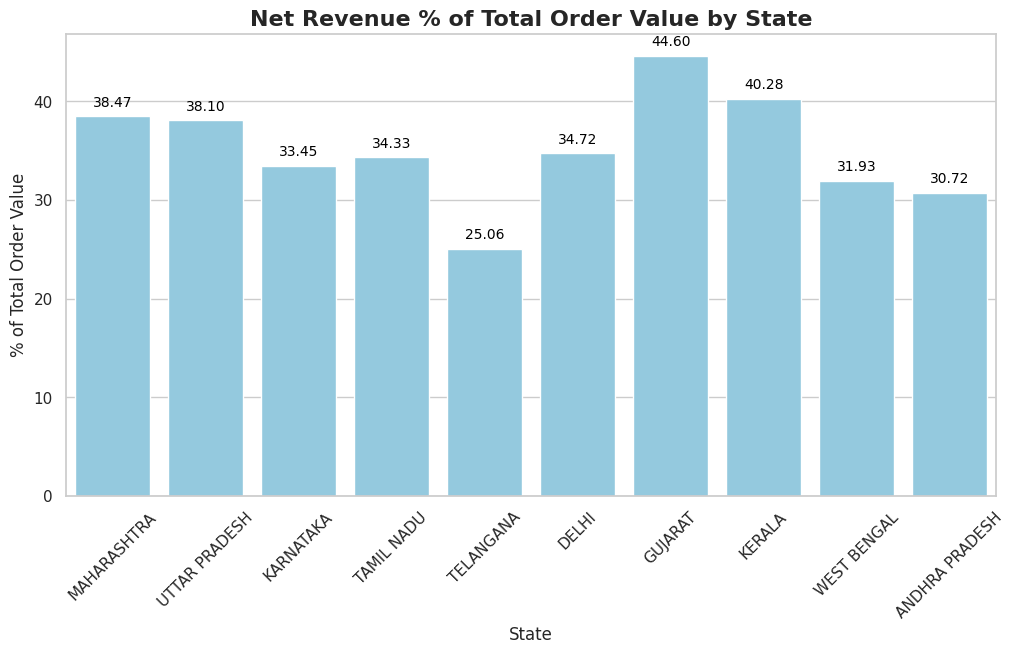

In [181]:
# 4. Net Revenue % of Total Order Value by State
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10_states, x="State", y="Net Revenue % of Total Order Value,", color="skyblue")
add_values(ax)
plt.title("Net Revenue % of Total Order Value by State", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("% of Total Order Value")
plt.show()

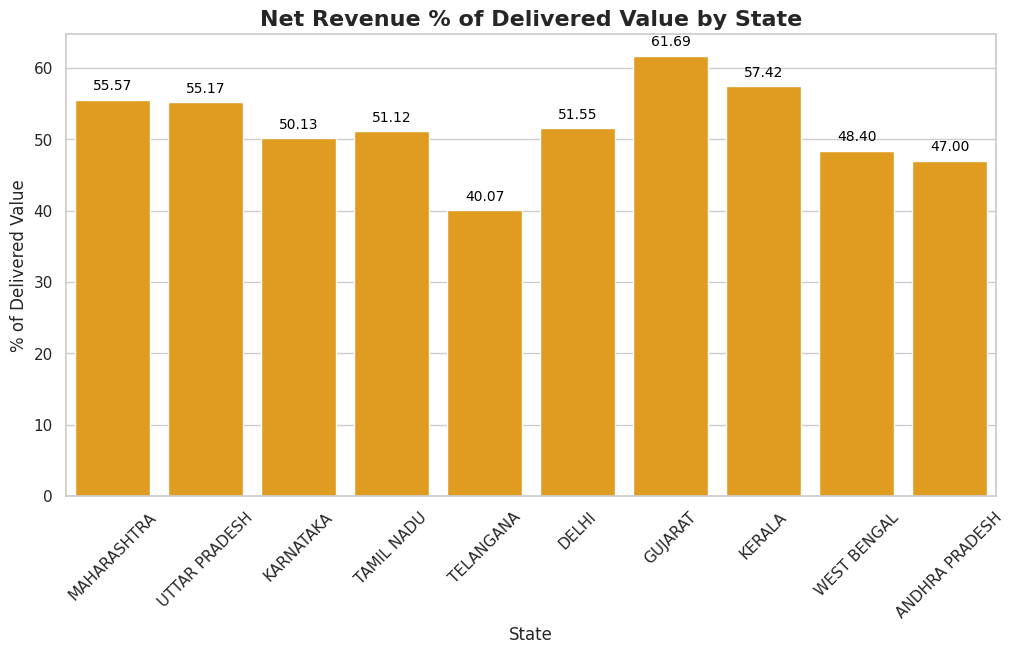

In [182]:
# 5. Net Revenue % of Delivered Value by State_region
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10_states, x="State", y="Net Revenue % of Delivered Value,", color="orange")
add_values(ax)
plt.title("Net Revenue % of Delivered Value by State", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("% of Delivered Value")
plt.show()


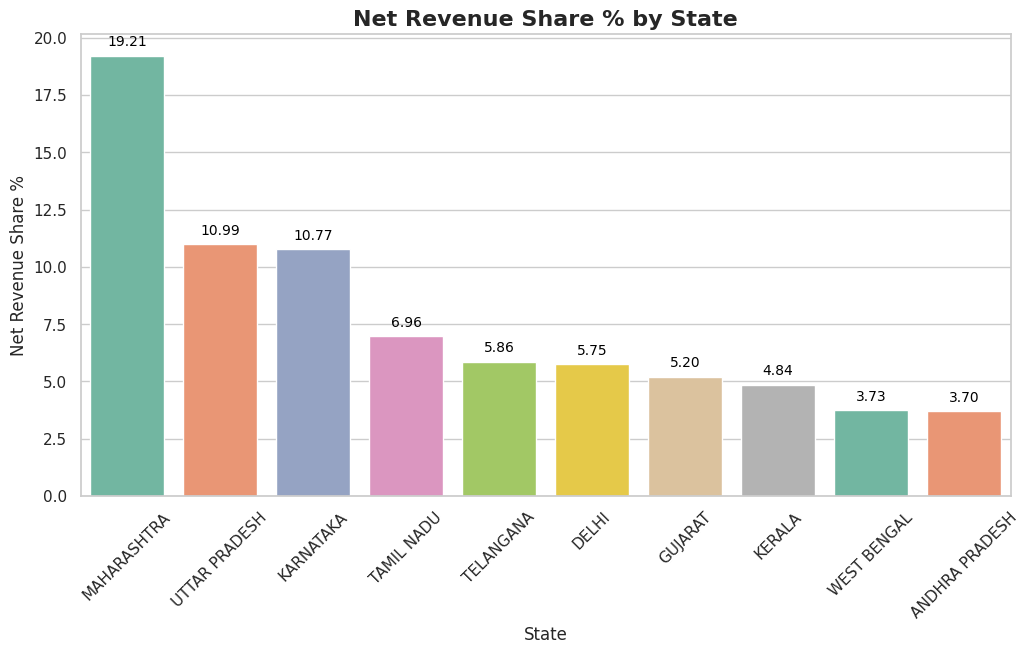

In [183]:
# 6. Net Revenue Share % by State_region
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10_states, x="State", y="Net Revenue share %,", palette="Set2")
add_values(ax)
plt.title("Net Revenue Share % by State", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Net Revenue Share %")
plt.show()

In [184]:
# ---- Select Top 10 & Bottom 10 States based on Net Revenue ----
bottom_10_states = grouped.nsmallest(10, 'Net Revenue')
# Final Output (Top 10)
final_result = pd.concat([bottom_10_states])
# Print final result
final_result.index = range(1, len(final_result) + 1)
final_result

Order_status,State,Cancelled Amount,Delivered Amount,Net Revenue,"Net Revenue % of Total Order Value,","Net Revenue % of Delivered Value,","Net Revenue share %,"
1,ANDAMAN & NICOBAR,20751.24,15926.0,-4825.24,-13.155952,-30.297878,-0.075703
2,LADAKH,5603.43,3751.0,-1852.43,-19.802703,-49.384964,-0.029063
3,MIZORAM,4717.67,4072.0,-645.67,-7.345782,-15.856336,-0.010130
4,ARUNACHAL PRADESH,8424.52,7989.0,-435.52,-2.653422,-5.451496,-0.006833
5,ORISSA,0.00,1361.0,1361.00,100.000000,100.000000,0.021353
6,NAGALAND,16157.00,23294.0,7137.00,18.090796,30.638791,0.111971
7,SIKKIM,5720.95,14771.0,9050.05,44.163928,61.269041,0.141985
8,MEGHALAYA,13588.09,22927.0,9338.91,25.575481,40.733240,0.146517
9,TRIPURA,3968.95,15198.0,11229.05,58.585482,73.885051,0.176171
10,PUDUCHERRY,14088.48,32865.0,18776.52,39.989624,57.132268,0.294582


/tmp/ipython-input-3973057513.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=11)
/tmp/ipython-input-3973057513.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=11)
/tmp/ipython-input-3973057513.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=11)
/tmp/ipython-input-3973057513.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=11)
/tmp/ipython-inp

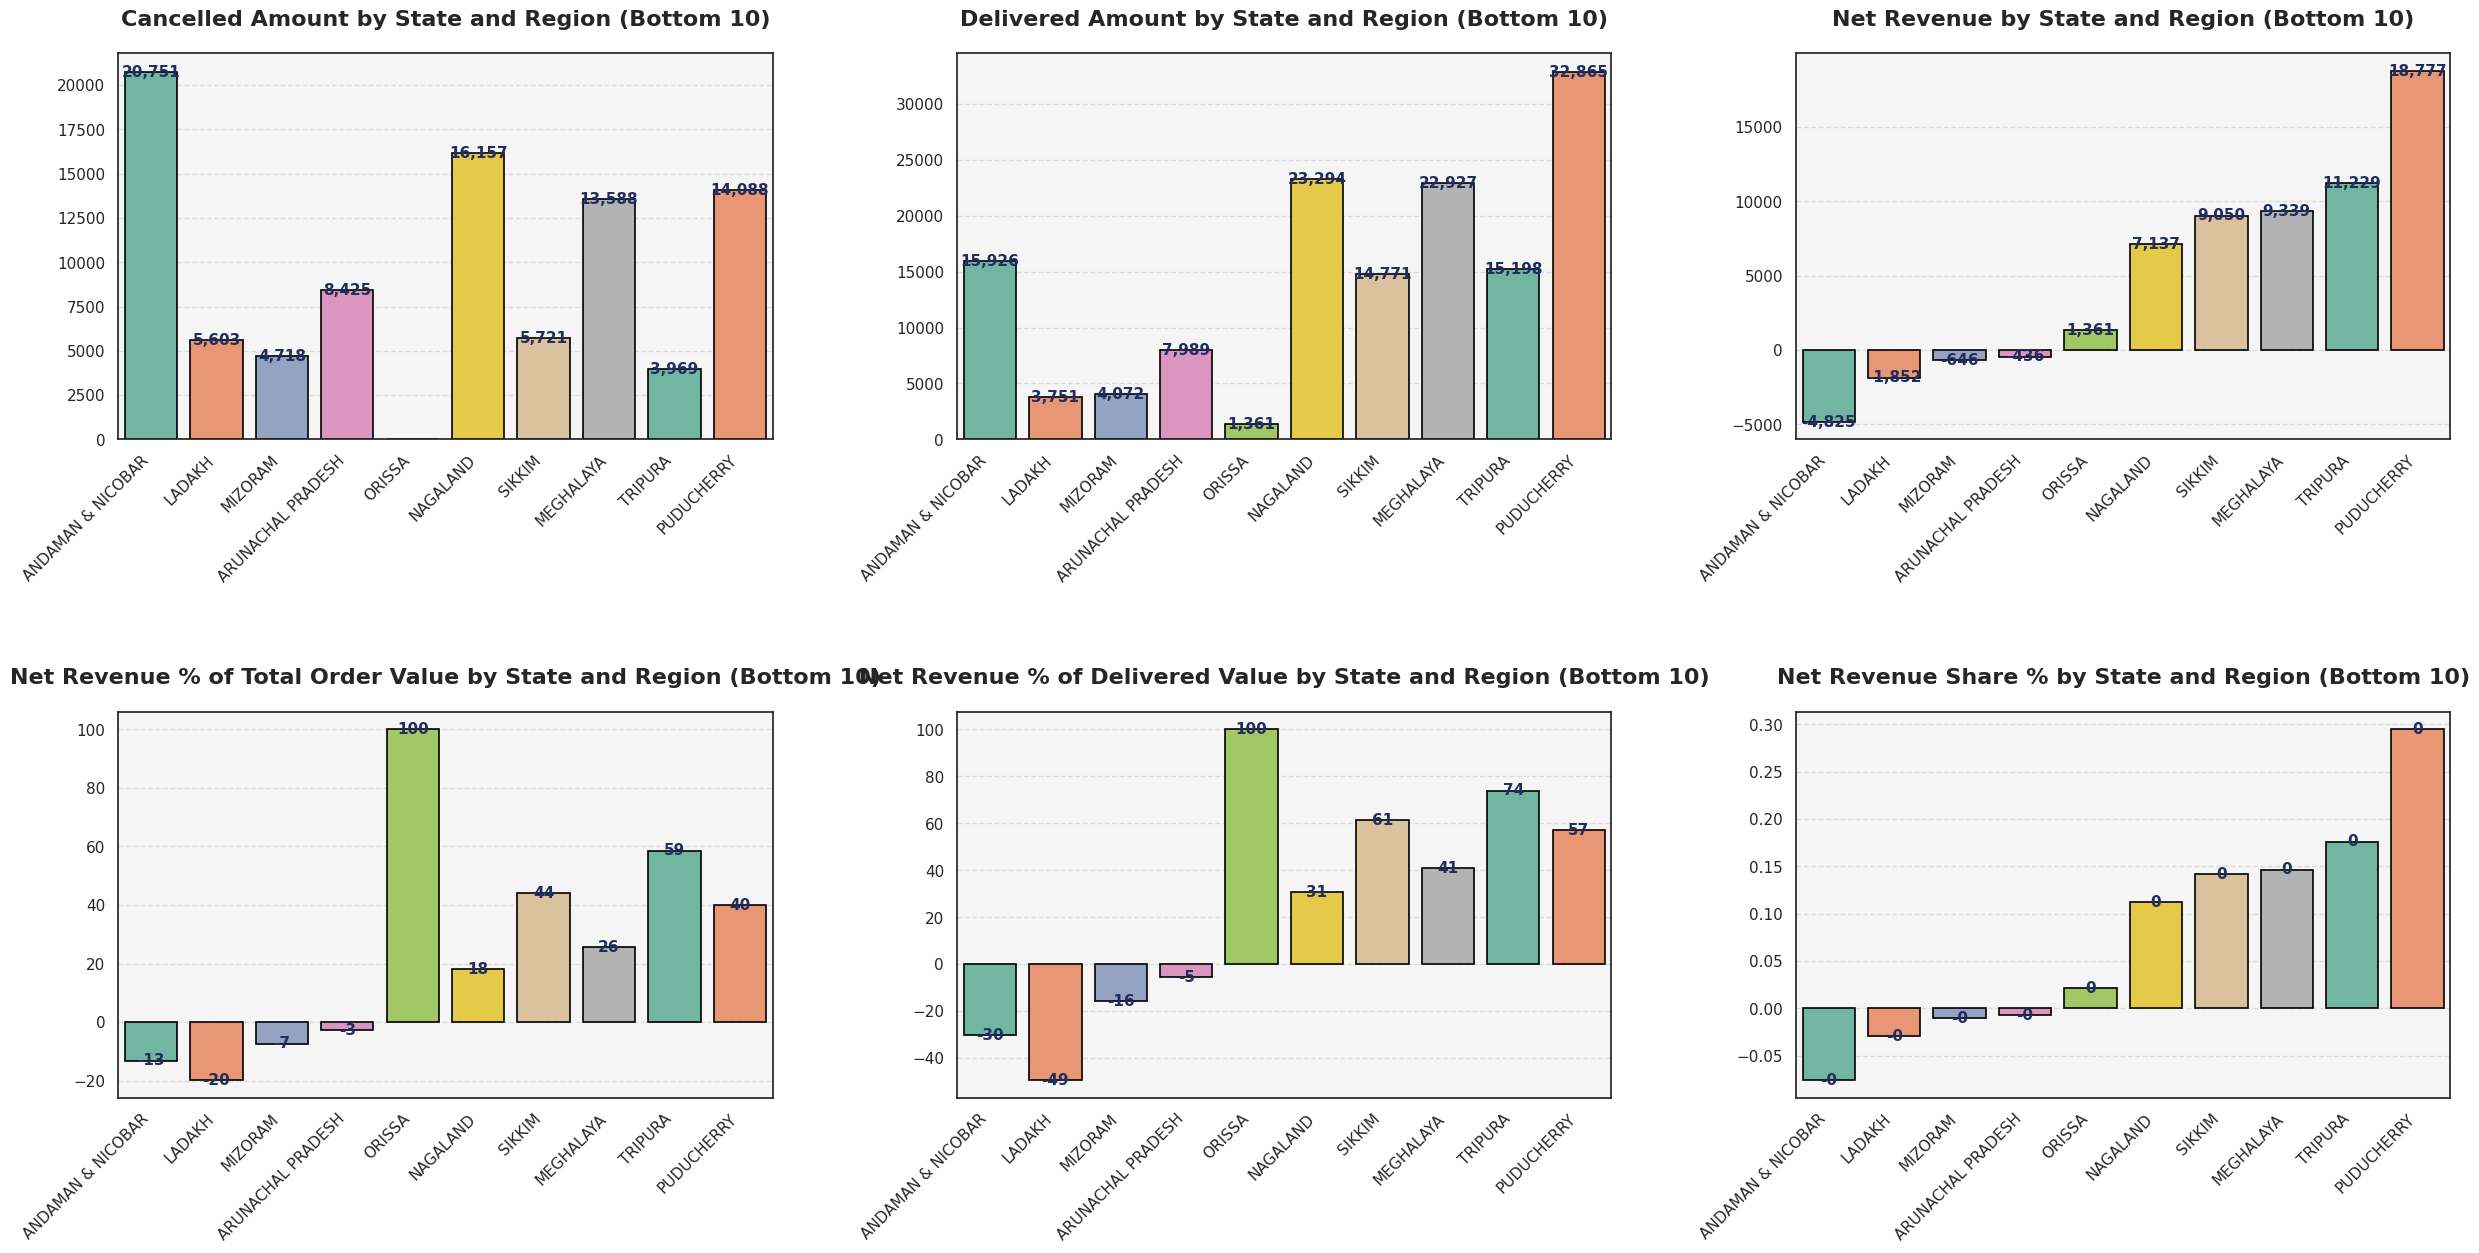

In [185]:
import matplotlib.patches as patches

sns.set(style="white", palette="pastel")

# Metrics and titles
metrics = [
   ("Cancelled Amount", "Cancelled Amount by State and Region (Bottom 10)"),
    ("Delivered Amount", "Delivered Amount by State and Region (Bottom 10)"),
    ("Net Revenue", "Net Revenue by State and Region (Bottom 10)"),
    ("Net Revenue % of Total Order Value,", "Net Revenue % of Total Order Value by State and Region (Bottom 10)"),
    ("Net Revenue % of Delivered Value,", "Net Revenue % of Delivered Value by State and Region (Bottom 10)"),
    ("Net Revenue share %,", "Net Revenue Share % by State and Region (Bottom 10)")

 ]

# Create figure and axes
fig, axes = plt.subplots(2, 3, figsize=(26, 14))
axes = axes.flatten()

# Plot each metric
for i, (y_metric, title) in enumerate(metrics):
    ax = axes[i]
    try:
        # Plot the bar chart
        sns.barplot(
            data=bottom_10_states, x="State", y=y_metric, # Removed hue="State_region" as State_region for bottom states is mostly North-East/Islands/East and would not provide meaningful hue for individual states
            palette=sns.color_palette("Set2", n_colors=len(bottom_10_states['State'].unique())),
            edgecolor="black", linewidth=1.2, ax=ax
        )
        ax.set_facecolor("#f5f5f5")  # light gray background for each subplot
        ax.set_title(title, fontsize=16, fontweight="bold", pad=20)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=11)
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.grid(axis='y', linestyle='--', alpha=0.6)

        # Legend (Only show legend for the first plot if needed, or remove if hue is not used)
        if i == 0 and 'State_region' in bottom_10_states.columns: # Check if hue was used and State_region column exists
             ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="State Region", frameon=True, edgecolor="gray")
        elif ax.get_legend() is not None: # Check if legend exists before attempting to remove
            ax.get_legend().remove()

        # Add values on top of bars
        for p in ax.patches:
            height = p.get_height()
            # Add check for non-zero height to avoid annotating bars with 0 height
            if height != 0:
                ax.annotate(f'{height:,.0f}',
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='center', fontsize=11, color='#1f2e5f', fontweight='bold')
    except Exception as e:
        print(f"Error plotting {y_metric}: {e}")


plt.tight_layout(pad=5.0)
plt.show()

In [186]:
# Keep only Delivered & Cancelled
df_filtered = df[df['Order_status'].isin(['Delivered', 'Cancelled'])]
# Group by State and calculate Delivered Amount & Cancelled Amount
grouped = df_filtered.groupby(["State_region",'State', 'Order_status'])['Amount'].sum().unstack(fill_value=0)
# Rename columns
grouped = grouped.rename(columns={'Delivered': 'Delivered Amount', 'Cancelled': 'Cancelled Amount'})
# Calculate Net Revenue (Delivered - Cancelled)
grouped['Net Revenue'] = grouped['Delivered Amount'] - grouped['Cancelled Amount']
# Formula 1: (Net Revenue / (Delivered + Cancelled)) * 100
grouped['Net Revenue % of Total Order Value,'] = (
    grouped['Net Revenue'] / (grouped['Delivered Amount'] + grouped['Cancelled Amount'])
) * 100
# Formula 2: (Net Revenue / Delivered Amount) * 100
grouped['Net Revenue % of Delivered Value,'] = (
    grouped['Net Revenue'] / grouped['Delivered Amount']
) * 100
# Formula 3: (Net Revenue / Total Net Revenue) * 100
total_net_revenue = grouped['Net Revenue'].sum()
grouped['Net Revenue share %,'] = (grouped['Net Revenue'] / total_net_revenue) * 100
# Reset index for clean table
grouped = grouped.reset_index()
# ---- Select Top 10 & Bottom 10 States based on Net Revenue ----
top_10_statess = grouped.nlargest(35, 'Net Revenue')
# Final Output (Top 10)
final_results = pd.concat([top_10_statess])
# Print final result
final_results.index = range(1, len(final_results) + 1)
final_results

Order_status,State_region,State,Cancelled Amount,Delivered Amount,Net Revenue,"Net Revenue % of Total Order Value,","Net Revenue % of Delivered Value,","Net Revenue share %,"
1,West,MAHARASHTRA,978981.43,2203287.0,1224305.57,38.472731,55.567231,19.207976
2,North,UTTAR PRADESH,568995.78,1269301.0,700305.22,38.095330,55.172510,10.987001
3,South,KARNATAKA,683184.12,1369866.0,686681.88,33.446913,50.127668,10.773266
4,South,TAMIL NADU,424475.21,868359.0,443883.79,34.334162,51.117544,6.964037
5,South,TELANGANA,558847.80,932536.0,373688.20,25.056474,40.072255,5.862747
6,North,DELHI,344692.91,711393.0,366700.09,34.722562,51.546767,5.753112
7,West,GUJARAT,205678.98,536884.0,331205.02,44.602953,61.690238,5.196234
8,South,KERALA,228883.95,537601.0,308717.05,40.276988,57.424940,4.843423
9,East,WEST BENGAL,253298.69,490904.0,237605.31,31.927499,48.401584,3.727760
10,South,ANDHRA PRADESH,266140.34,502116.0,235975.66,30.715745,46.996244,3.702192


# **Problem Statement**


*   Most of the orders in your dataset are still in progress, but only Delivered and Cancelled orders show the final outcome. Understanding why some orders succeed while others fail is important for better operations and planning. By looking at Fulfilment_type (Merchant vs Amazon) and Shipping_service (Standard vs Expedited), we can see if these factors affect whether an order is delivered or cancelled.
For orders still in progress (In Transit, Pending, Problematic), predicting the chances of them being delivered or cancelled helps estimate future revenue, improve logistics, manage inventory, and enhance customer experience.

# **Justification**


*   Most analyses only look at the total number of Delivered or Cancelled orders. By examining Fulfilment_type and Shipping_service, we can see which factors actually influence whether an order succeeds or fails. This gives a clearer picture of operational strengths and weaknesses.
Using past Delivered and Cancelled orders, we can predict what will likely happen to orders still in progress. This “future insight” helps estimate potential revenue that isn’t obvious from raw counts, which most analysts usually ignore.
These predictions allow businesses to make smarter decisions. For example, if certain shipping methods or fulfilment types have higher cancellation rates, the company can adjust operations to improve delivery success.
Finally, forecasting likely cancellations for pending orders helps with revenue planning and inventory management. It gives the company a proactive way to optimize resources and improve customer satisfaction.





In [187]:
df

,Order_status,Fulfilment_type,Sales Channel,Shipping_service,Product_category,product_size,quantity,Amount,City,State,B2B,State_region
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False,West
1,Delivered,Merchant,Amazon.in,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False,South
2,In Transit,Amazon,Amazon.in,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,West
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False,South
4,In Transit,Amazon,Amazon.in,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False,South
...,...,...,...,...,...,...,...,...,...,...,...,...
71948,In Transit,Amazon,Amazon.in,Expedited,Western Dress,S,1,899.00,KALAMASSERY,KERALA,False,South
71949,In Transit,Amazon,Amazon.in,Expedited,Set,XL,1,824.00,NEW DELHI,DELHI,False,North
71950,Cancelled,Amazon,Amazon.in,Expedited,Set,M,1,612.00,MUMBAI,MAHARASHTRA,False,West
71951,In Transit,Amazon,Amazon.in,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False,South


In [188]:
df["Order_status"].value_counts()

,count
Order_status,
In Transit,44211
Delivered,18338
Cancelled,8676
Pending,724
Problematic,4


In [189]:
df["Fulfilment_type"].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [190]:
df["Shipping_service"].unique()

array(['Standard', 'Expedited'], dtype=object)

In [191]:
df.shape

(71953, 12)

In [192]:
delivered_df = df[df['Order_status'] == 'Delivered']

In [193]:
service_counts = delivered_df['Shipping_service'].value_counts()
print(service_counts)

Shipping_service
Standard    18338
Name: count, dtype: int64


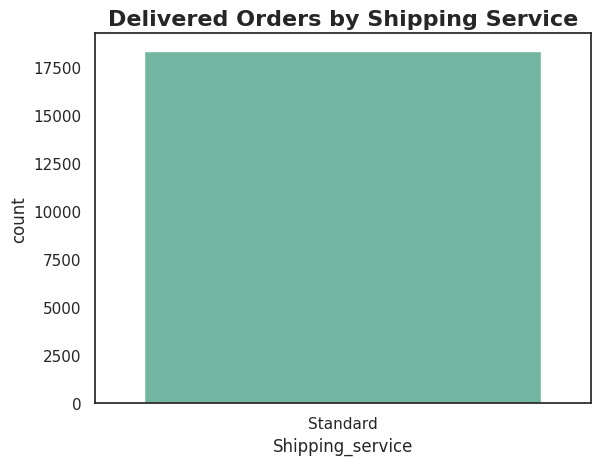

In [204]:
sns.countplot(data=delivered_df, x="Shipping_service", palette="Set2")
plt.title("Delivered Orders by Shipping Service", fontsize=16, fontweight="bold")
plt.show()

In [194]:
fulfilment_counts = delivered_df['Fulfilment_type'].value_counts()
print(fulfilment_counts)


Fulfilment_type
Merchant    18338
Name: count, dtype: int64


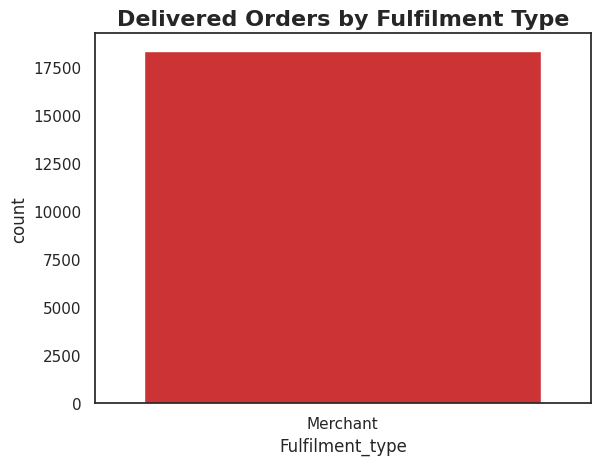

In [203]:
sns.countplot(data=delivered_df, x="Fulfilment_type", palette="Set1")
plt.title("Delivered Orders by Fulfilment Type", fontsize=16, fontweight="bold")
plt.show()


In [197]:
cancelled = df[df['Order_status'] == 'Cancelled']

In [198]:
cancel_by_shipping = cancelled['Shipping_service'].value_counts()
print(cancel_by_shipping)
print("Cancelled by Shipping Service (%)")
print(cancel_by_shipping / cancel_by_shipping.sum() * 100)


Shipping_service
Standard     4913
Expedited    3763
Name: count, dtype: int64
Cancelled by Shipping Service (%)
Shipping_service
Standard     56.627478
Expedited    43.372522
Name: count, dtype: float64


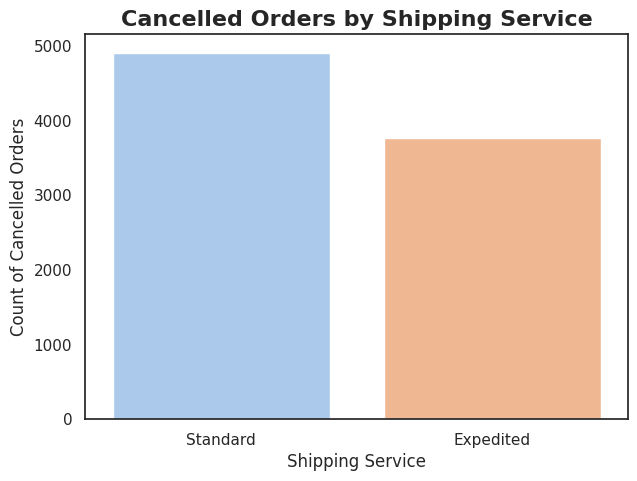

In [200]:
#Cancelled Orders vs Shipping Service
plt.figure(figsize=(7,5))
sns.countplot(data=df[df['Order_status'] == 'Cancelled'],
              x="Shipping_service", palette="pastel")
plt.title("Cancelled Orders by Shipping Service", fontsize=16, fontweight="bold")
plt.xlabel("Shipping Service")
plt.ylabel("Count of Cancelled Orders")
plt.show()

In [199]:
cancel_by_fulfilment = cancelled['Fulfilment_type'].value_counts()
print(cancel_by_fulfilment)
print("\nCancelled by Fulfilment Type (%)")
print(cancel_by_fulfilment / cancel_by_fulfilment.sum() * 100)

Fulfilment_type
Merchant    4909
Amazon      3767
Name: count, dtype: int64

Cancelled by Fulfilment Type (%)
Fulfilment_type
Merchant    56.581374
Amazon      43.418626
Name: count, dtype: float64


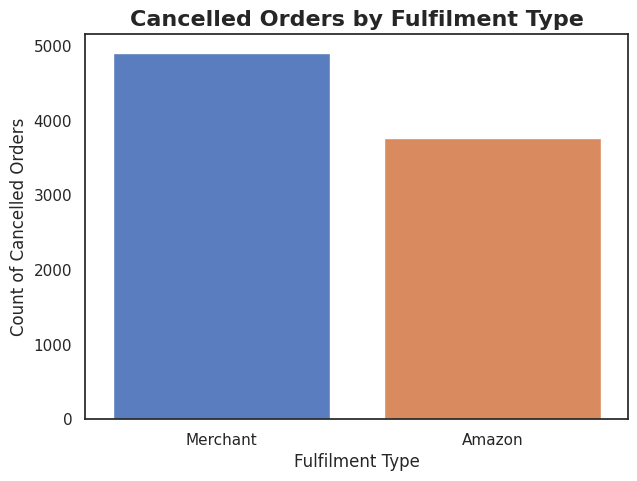

In [201]:
#Cancelled Orders vs Fulfilment Type
plt.figure(figsize=(7,5))
sns.countplot(data=df[df['Order_status'] == 'Cancelled'],
              x="Fulfilment_type", palette="muted")
plt.title("Cancelled Orders by Fulfilment Type", fontsize=16, fontweight="bold")
plt.xlabel("Fulfilment Type")
plt.ylabel("Count of Cancelled Orders")
plt.show()

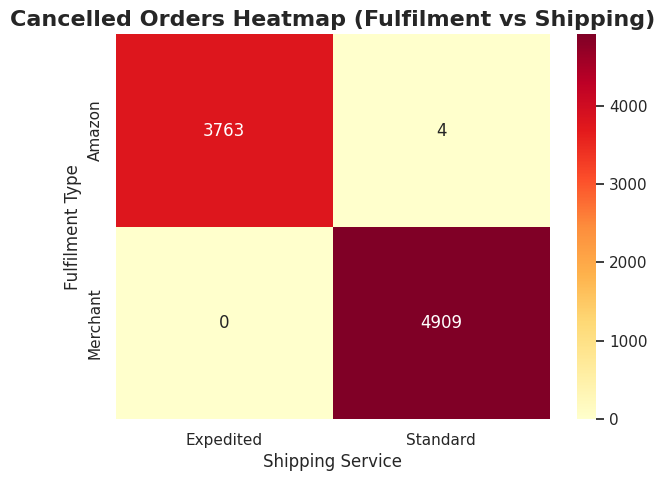

In [202]:
#Percentage-wise Heatmap for Clear Influence
cancelled_data = df[df['Order_status'] == 'Cancelled']
heatmap_data = cancelled_data.groupby(["Fulfilment_type","Shipping_service"]).size().unstack(fill_value=0)

plt.figure(figsize=(7,5))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Cancelled Orders Heatmap (Fulfilment vs Shipping)", fontsize=16, fontweight="bold")
plt.xlabel("Shipping Service")
plt.ylabel("Fulfilment Type")
plt.show()

In [205]:
print("Order_status Delivered")
grouped_data=delivered_df.groupby(['Fulfilment_type', 'Shipping_service', 'State_region'])
grouped_data.size().unstack(fill_value=0)

Order_status Delivered


,State_region,East,Islands,North,North-East,South,West
Fulfilment_type,Shipping_service,,,,,,
Merchant,Standard,1554,26,4233,427,6680,5418


In [207]:
print("Order_status Cancelled")
grouped_data=cancelled.groupby(['Fulfilment_type', 'Shipping_service', 'State_region'])
grouped_data.size().unstack(fill_value=0)

Order_status Cancelled


State_region                      East  Islands  North  North-East  South  \
Fulfilment_type Shipping_service                                            
Amazon          Expedited          300        7    729          75   1587   
                Standard             1        0      0           0      2   
Merchant        Standard           521       25   1154         146   1851   

State_region                      West  
Fulfilment_type Shipping_service        
Amazon          Expedited         1065  
                Standard             1  
Merchant        Standard          1212

In [ ]:
#ML Model

In [257]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")  # suppress unnecessary warnings
# --- Keep only Delivered & Cancelled ---
df_filtered = df[df['Order_status'].isin(['Delivered', 'Cancelled'])].copy()
# Features and target
X = df_filtered[['Fulfilment_type', 'Shipping_service']]
y = df_filtered['Order_status']
# Encode categorical variables
le_features = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_features[col] = le
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
# --- Train XGBoost ---
model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)
# --- Training Accuracy ---
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
# --- Testing Accuracy ---
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
# --- Overall Accuracy on full Delivered & Cancelled ---
y_full_pred = model.predict(X)
overall_acc = accuracy_score(y_encoded, y_full_pred)
print(f"\n Training Accuracy: {train_acc*100:.2f}%")
print(f" Testing Accuracy: {test_acc*100:.2f}%")
print(f"Overall Accuracy: {overall_acc*100:.2f}%")
# --- Classification report ---
print("\nClassification Report (Testing Set):\n", classification_report(y_test, y_test_pred, target_names=le_target.classes_))
# --- Predict remaining orders ---
df_remaining = df[df['Order_status'].isin(['In Transit', 'Pending', 'Problematic'])].copy()
X_remaining = df_remaining[['Fulfilment_type', 'Shipping_service']]
# Encode using the same label encoders
for col in X_remaining.columns:
    X_remaining[col] = le_features[col].transform(X_remaining[col])
# Predict probabilities
probs = model.predict_proba(X_remaining)
df_remaining['Prob_Delivered'] = probs[:, le_target.transform(['Delivered'])[0]]
df_remaining['Prob_Cancelled'] = probs[:, le_target.transform(['Cancelled'])[0]]
# Aggregate to percentages
summary = df_remaining.groupby('Order_status')[['Prob_Delivered','Prob_Cancelled']].mean() * 100
print("\nPredicted % of Delivered & Cancelled for remaining orders:\n", summary)



 Training Accuracy: 81.75%
 Testing Accuracy: 82.16%
Overall Accuracy: 81.83%

Classification Report (Testing Set):
               precision    recall  f1-score   support

   Cancelled       1.00      0.44      0.62      1735
   Delivered       0.79      1.00      0.88      3668

    accuracy                           0.82      5403
   macro avg       0.90      0.72      0.75      5403
weighted avg       0.86      0.82      0.80      5403


Predicted % of Delivered & Cancelled for remaining orders:
               Prob_Delivered  Prob_Cancelled
Order_status                                
In Transit          1.415712       98.584297
Pending            42.699303       57.300697
Problematic        78.809311       21.190691


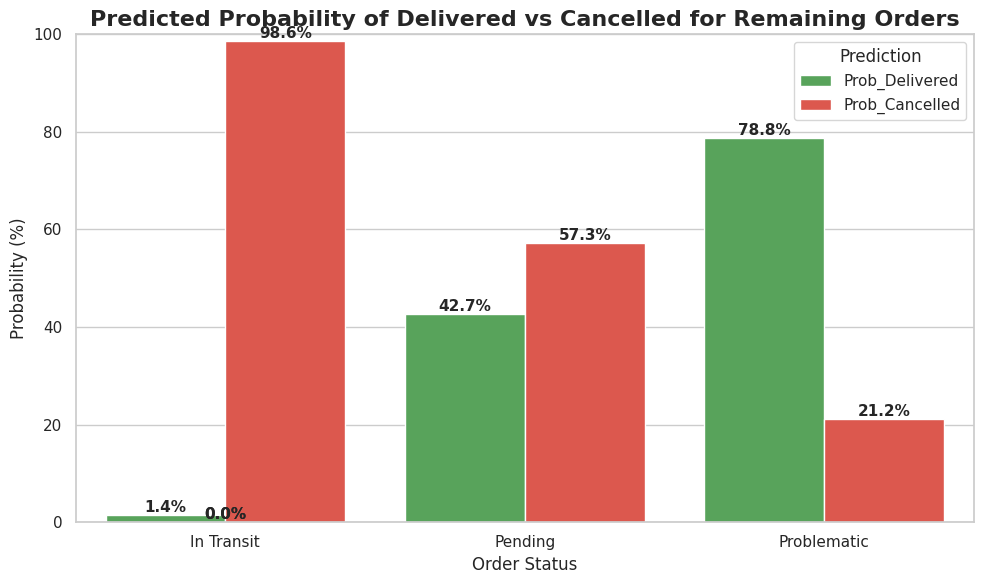

In [258]:
sns.set(style="whitegrid")
# Reset index for plotting
summary_plot = summary.reset_index().melt(
    id_vars='Order_status',
    value_vars=['Prob_Delivered', 'Prob_Cancelled'],
    var_name='Prediction',
    value_name='Probability (%)'
)
# Bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=summary_plot,
    x='Order_status',
    y='Probability (%)',
    hue='Prediction',
    palette=['#4CAF50', '#F44336']  # green for Delivered, red for Cancelled
)
# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.title("Predicted Probability of Delivered vs Cancelled for Remaining Orders", fontsize=16, fontweight='bold')
plt.xlabel("Order Status")
plt.ylabel("Probability (%)")
plt.ylim(0, 100)
plt.legend(title='Prediction')
plt.tight_layout()
plt.show()

In [254]:
# --- Install CatBoost if not installed ---
!pip install catboost --quiet

In [259]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")  # suppress unnecessary warnings

# --- Filter only Delivered & Cancelled for training ---
df_train = df[df['Order_status'].isin(['Delivered', 'Cancelled'])].copy()
X = df_train[['Fulfilment_type', 'Shipping_service']]
y = df_train['Order_status']
# Categorical features
cat_features = ['Fulfilment_type', 'Shipping_service']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# --- Train CatBoost ---
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100
)
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))
# --- Training Accuracy ---
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
# --- Testing Accuracy ---
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
# --- Overall Accuracy on full Delivered & Cancelled ---
y_full_pred = model.predict(X)
overall_acc = accuracy_score(y, y_full_pred)
print(f"\n Training Accuracy: {train_acc*100:.2f}%")
print(f" Testing Accuracy: {test_acc*100:.2f}%")
print(f" Overall Accuracy: {overall_acc*100:.2f}%")
# --- Evaluate ---
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
# --- Predict for remaining orders ---
df_remaining = df[df['Order_status'].isin(['In Transit', 'Pending', 'Problematic'])].copy()
X_remain = df_remaining[['Fulfilment_type', 'Shipping_service']]
probs = model.predict_proba(X_remain)
# Add probabilities
df_remaining['Prob_Delivered'] = probs[:, list(model.classes_).index('Delivered')]
df_remaining['Prob_Cancelled'] = probs[:, list(model.classes_).index('Cancelled')]
# Aggregate percentages by Order_status
summary = df_remaining.groupby('Order_status')[['Prob_Delivered', 'Prob_Cancelled']].mean() * 100
print("\nPredicted % of Delivered & Cancelled for remaining orders:\n", summary)


0:	learn: 0.8174541	test: 0.8215806	best: 0.8215806 (0)	total: 6.49ms	remaining: 3.24s
100:	learn: 0.8174541	test: 0.8215806	best: 0.8215806 (0)	total: 1.07s	remaining: 4.21s
200:	learn: 0.8174541	test: 0.8215806	best: 0.8215806 (0)	total: 2.22s	remaining: 3.3s
300:	learn: 0.8174541	test: 0.8215806	best: 0.8215806 (0)	total: 3.34s	remaining: 2.21s
400:	learn: 0.8174541	test: 0.8215806	best: 0.8215806 (0)	total: 3.97s	remaining: 981ms
499:	learn: 0.8174541	test: 0.8215806	best: 0.8215806 (0)	total: 4.41s	remaining: 0us

bestTest = 0.8215806034
bestIteration = 0

Shrink model to first 1 iterations.

 Training Accuracy: 81.75%
 Testing Accuracy: 82.16%
 Overall Accuracy: 81.83%

Classification Report:
               precision    recall  f1-score   support

   Cancelled       1.00      0.44      0.62      1735
   Delivered       0.79      1.00      0.88      3668

    accuracy                           0.82      5403
   macro avg       0.90      0.72      0.75      5403
weighted avg       

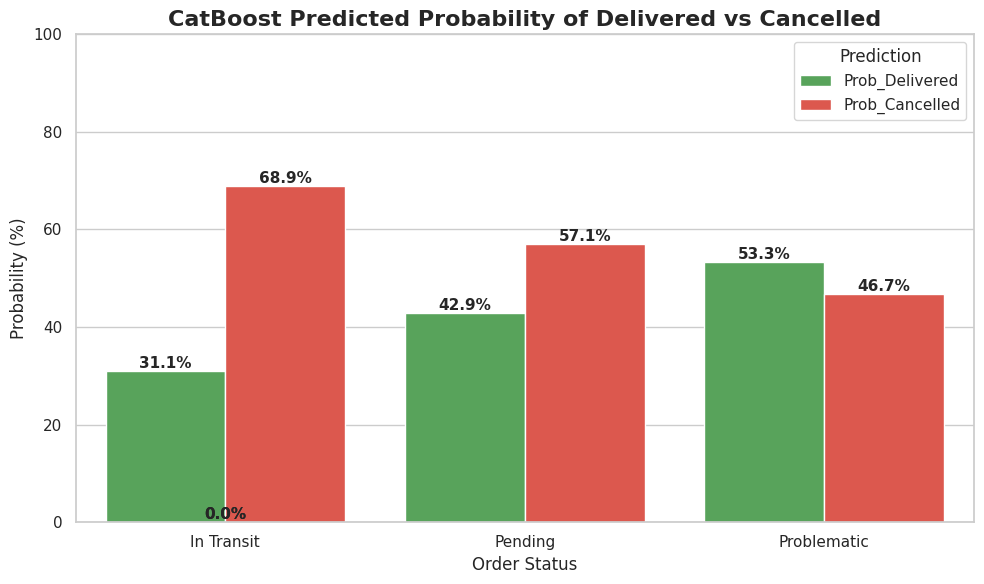

In [260]:
sns.set(style="whitegrid")
# Reset index and melt for plotting
summary_plot = summary.reset_index().melt(
    id_vars='Order_status',
    value_vars=['Prob_Delivered', 'Prob_Cancelled'],
    var_name='Prediction',
    value_name='Probability (%)'
)
# Bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=summary_plot,
    x='Order_status',
    y='Probability (%)',
    hue='Prediction',
    palette=['#4CAF50', '#F44336']  # Green = Delivered, Red = Cancelled
)
# Add value labels on top
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')
plt.title("CatBoost Predicted Probability of Delivered vs Cancelled", fontsize=16, fontweight='bold')
plt.xlabel("Order Status")
plt.ylabel("Probability (%)")
plt.ylim(0, 100)
plt.legend(title='Prediction')
plt.tight_layout()
plt.show()

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")  # suppress unnecessary warnings

# --- Keep only Delivered & Cancelled ---
df_filtered = df[df['Order_status'].isin(['Delivered', 'Cancelled'])].copy()
# Features and target
X = df_filtered[['Fulfilment_type', 'Shipping_service']]
y = df_filtered['Order_status']
# Encode categorical variables
le_features = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_features[col] = le
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=12, stratify=y_encoded
)
# --- Train Random Forest ---
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)
# --- Training Accuracy ---
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
# --- Testing Accuracy ---
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
# --- Overall Accuracy on full Delivered & Cancelled ---
y_full_pred = model.predict(X)
overall_acc = accuracy_score(y_encoded, y_full_pred)
print(f"\n Training Accuracy: {train_acc*100:.2f}%")
print(f" Testing Accuracy: {test_acc*100:.2f}%")
print(f"Overall Accuracy: {overall_acc*100:.2f}%")
# --- Classification report ---
print("\nClassification Report (Testing Set):\n", classification_report(y_test, y_test_pred, target_names=le_target.classes_))
# --- Predict remaining orders ---
df_remaining = df[df['Order_status'].isin(['In Transit', 'Pending', 'Problematic'])].copy()
X_remaining = df_remaining[['Fulfilment_type', 'Shipping_service']]
# Encode using the same label encoders
for col in X_remaining.columns:
    X_remaining[col] = le_features[col].transform(X_remaining[col])
# Predict probabilities
probs = model.predict_proba(X_remaining)
df_remaining['Prob_Delivered'] = probs[:, le_target.transform(['Delivered'])[0]]
df_remaining['Prob_Cancelled'] = probs[:, le_target.transform(['Cancelled'])[0]]
# Aggregate to percentages
summary = df_remaining.groupby('Order_status')[['Prob_Delivered','Prob_Cancelled']].mean() * 100
print("\nPredicted % of Delivered & Cancelled for remaining orders:\n", summary)



 Training Accuracy: 81.88%
 Testing Accuracy: 81.60%
Overall Accuracy: 81.83%

Classification Report (Testing Set):
               precision    recall  f1-score   support

   Cancelled       1.00      0.43      0.60      1735
   Delivered       0.79      1.00      0.88      3668

    accuracy                           0.82      5403
   macro avg       0.89      0.71      0.74      5403
weighted avg       0.86      0.82      0.79      5403


Predicted % of Delivered & Cancelled for remaining orders:
               Prob_Delivered  Prob_Cancelled
Order_status                                
In Transit          1.351492       98.648508
Pending            42.744816       57.255184
Problematic        78.936958       21.063042


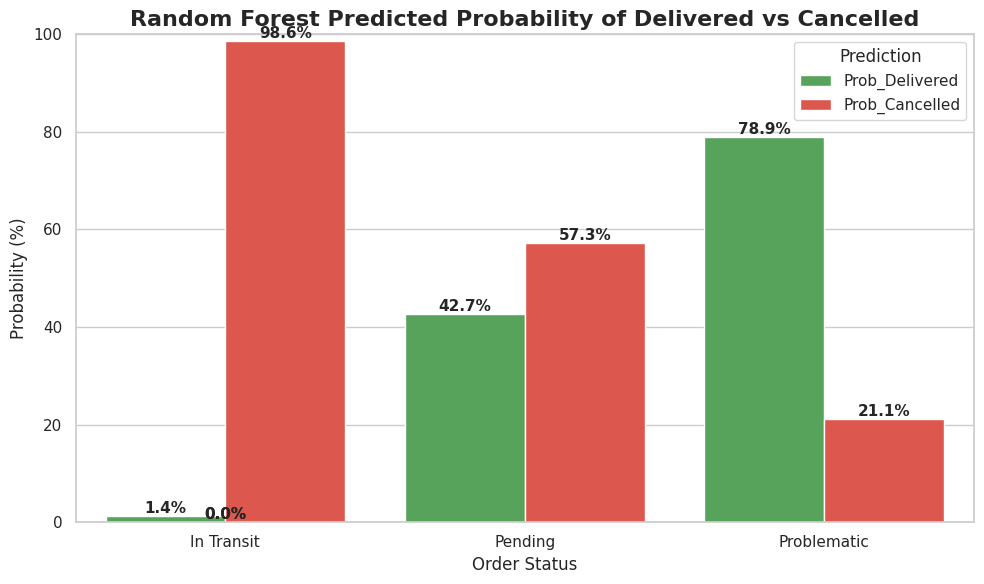

In [262]:
sns.set(style="whitegrid")
# Reset index and reshape for plotting
summary_plot = summary.reset_index().melt(
    id_vars='Order_status',
    value_vars=['Prob_Delivered', 'Prob_Cancelled'],
    var_name='Prediction',
    value_name='Probability (%)'
)
# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=summary_plot,
    x='Order_status',
    y='Probability (%)',
    hue='Prediction',
    palette=['#4CAF50', '#F44336']  # green for Delivered, red for Cancelled
)
# Add value labels on top
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')
plt.title("Random Forest Predicted Probability of Delivered vs Cancelled", fontsize=16, fontweight='bold')
plt.xlabel("Order Status")
plt.ylabel("Probability (%)")
plt.ylim(0, 100)
plt.legend(title='Prediction')
plt.tight_layout()
plt.show()

In [231]:
!pip install rulefit


  Preparing metadata (setup.py) ... done
  Created wheel for rulefit: filename=rulefit-0.3.1-py3-none-any.whl size=7798 sha256=6f94998afb5f6ff6207f32dff598cbaa489156c4e121341f4f12d28f32915fe4
  Stored in directory: /root/.cache/pip/wheels/40/ae/a3/ad2ff0555b4b268ff64c3ed0093a3b5daf92748ff94c3e6968
Successfully built rulefit


In [263]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from rulefit import RuleFit
import warnings
warnings.filterwarnings("ignore")  # suppress unnecessary warnings

df_filtered = df[df['Order_status'].isin(['Delivered', 'Cancelled'])].copy()

X = df_filtered[['Fulfilment_type', 'Shipping_service']].copy()
y = df_filtered['Order_status'].copy()

le_features = {}
for col in X.columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])
    le_features[col] = le

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)  # 0 = Cancelled, 1 = Delivered

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

rf_model = RuleFit(tree_size=4, sample_fract='default', max_rules=2000, random_state=42)
rf_model.fit(X_train.values, y_train, feature_names=X.columns)

y_pred_train = (rf_model.predict(X_train.values) >= 0.5).astype(int)
y_pred_test = (rf_model.predict(X_test.values) >= 0.5).astype(int)

print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)*100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)*100:.2f}%")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=le_target.classes_))

df_remaining = df[df['Order_status'].isin(['In Transit', 'Pending', 'Problematic'])].copy()
X_remaining = df_remaining[['Fulfilment_type', 'Shipping_service']].copy()

# Encode features using same LabelEncoders
for col in X_remaining.columns:
    X_remaining.loc[:, col] = le_features[col].transform(X_remaining[col])

# Predict probabilities
probs = rf_model.predict(X_remaining.values)
df_remaining['Prob_Delivered'] = probs
df_remaining['Prob_Cancelled'] = 1 - probs

summary = df_remaining.groupby('Order_status')[['Prob_Delivered','Prob_Cancelled']].mean() * 100
print("\nPredicted Delivery & Cancellation Percentages for Remaining Orders:")
print(summary)

rules = rf_model.get_rules()
rules = rules[rules.coef != 0].sort_values(by="support", ascending=False)
print("\nTop Rules Extracted by RuleFit:")
print(rules.head(10))


Training Accuracy: 81.75%
Testing Accuracy: 82.16%

Classification Report (Test Set):
              precision    recall  f1-score   support

   Cancelled       1.00      0.44      0.62      1735
   Delivered       0.79      1.00      0.88      3668

    accuracy                           0.82      5403
   macro avg       0.90      0.72      0.75      5403
weighted avg       0.86      0.82      0.80      5403


Predicted Delivery & Cancellation Percentages for Remaining Orders:
              Prob_Delivered  Prob_Cancelled
Order_status                                
In Transit          1.390977       98.609023
Pending            42.694420       57.305580
Problematic        78.796488       21.203512

Top Rules Extracted by RuleFit:
                    rule    type          coef   support    importance
0        Fulfilment_type  linear  7.872861e-01  1.000000  2.720571e-01
2  Fulfilment_type > 0.5    rule  4.397776e-15  0.868635  1.485563e-15


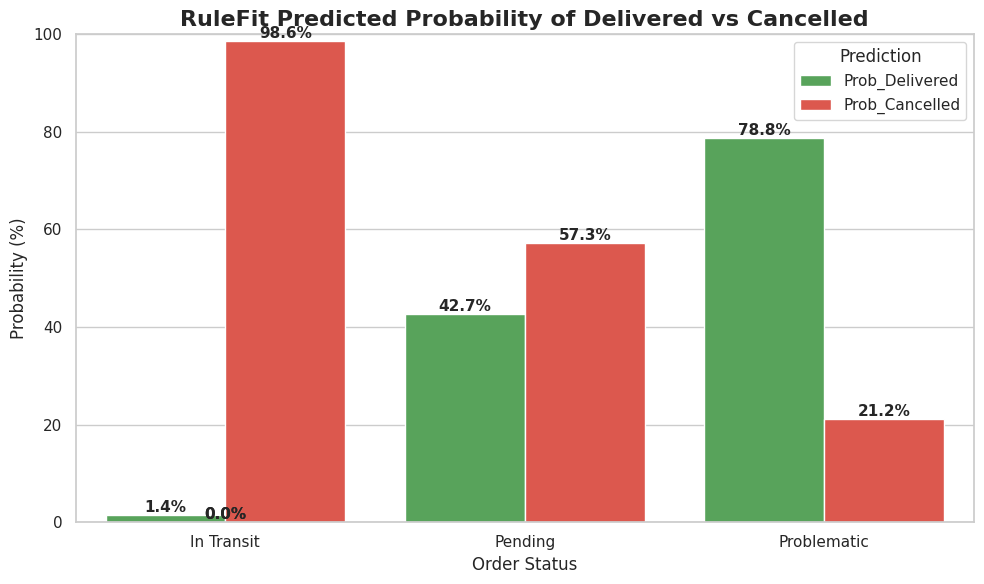

In [264]:
sns.set(style="whitegrid")
# Reset index and reshape for plotting
summary_plot = summary.reset_index().melt(
    id_vars='Order_status',
    value_vars=['Prob_Delivered', 'Prob_Cancelled'],
    var_name='Prediction',
    value_name='Probability (%)'
)
# Bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=summary_plot,
    x='Order_status',
    y='Probability (%)',
    hue='Prediction',
    palette=['#4CAF50', '#F44336']  # Green = Delivered, Red = Cancelled
)
# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')
plt.title("RuleFit Predicted Probability of Delivered vs Cancelled", fontsize=16, fontweight='bold')
plt.xlabel("Order Status")
plt.ylabel("Probability (%)")
plt.ylim(0, 100)
plt.legend(title='Prediction')
plt.tight_layout()
plt.show()